# Project 2: Ames Housing Price Analysis [Part I]

This is the second project done as part of the General Assembly's Data Science Immersive in June 2021.

This is the part I-of-II of the **Ames Housing Price Analysis** project. In this part we define the problem statement, explore the data, perform EDA, clean the data, perform some feature engineering, and save it; then use it to predict the sale price of properties using **_Linear Regression_** models in [part II](./ames-housing-modeling.ipynb).

## Overview

Many factors affect the price of a property, whether it is an apartment or a  house, how many rooms does it have and how big they are. Property prices can fluctuate based on many extrinsic reasons like economic conditions, local policy changes, tax regulations, public infrastructure developments in the neighborhood, industrialisation, etc. However, the intrinsic properties of a real estate entity are what we have to work with and usually in our control. Quantifying and noting down some of them can help you keep a record of the price variations over a period of time.

One such use might be, case-in-point, when you work at a real estate agency in the city of Ames, Iowa. Traditionally, the house prices in small cities would be the highest bidder who knew about the sale. But with rise in technology and interest in automating such processes that can fetch higher and fairer prices for property sales, real estate agents in larger cities have been employing these modern methods and getting good returns.

## Problem Statement

**As a data analyst we are tasked with the challenge to use this quantified housing data, and make analytical predictions for the property sale prices in the city, using simple machine learning methods. At our agency, we use this data to predict house prices for any seller that intends to make a sale for their property based on the house's features.**

## Executive Summary

We start by dividing the data features into numerical & categorical types and explore them separately, look for missing data and make decision to either not consider the feature, if many values are missing, or impute them with sensible replacements. While we do this we need to make sure we don't _leak_ data from train to test dataset. After going through most of the features we are interested in to consider, we make decision based on evidence to select it for model training or not. Following that, we clean and save the data, which is then imported in part II of this project for modeling. There, we begin with establishing a _baseline_ score, followed by a simple linear regression model and then we build towards the actual modeling process. Some of these regression models would requrie us to _scale_ the data, and then the model performances are compared with each other based on metrics of choice as described below. Some interaction terms and polynomial scaling of features is also done. A best model is made as production-ready by retraining it on the _entire_ training data and the results uploaded to kaggle for getting the final __test__ score. The observations and conclusions are listed out at the end while explaining the learnings of this project.

### Data

In this project, we work on the Ames Housing data from [kaggle](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/overview). The data dictionary can be found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

The data is obtained from the kaggle competition webpage linked above. It contains the following three files:
- `train.csv`: contains all the features including the target, _SalePrice_. This is explored, cleaned and after feature selection used to train the models.
- `test.csv`: contains all the features except the target, _SalePrice_. Since the _true_ value of the target is unavailable, we solely use this data at the end for model evaluation and submissions to kaggle.
- `sample_sub_reg.csv`: a sample file for the kaggle submission format. Contains only the _Id_ & predicted _SalePrice_.

The data provided contains many features any potential buyer/seller might be interested in to judge it's price. Some of those things might be $-$ number of bedroom, bathrooms, square footage of the lot, how old the construction is, locality, quality of the house, and other amenities like, garage size, pool and fireplaces $-$ are among the features included in the dataset provided. Not all features contribute to the real value of the property and, thus, as someone who works at a real estate agency in this city, it is our job to clean the data, lookout for any possible disparities, interdependencies among various features, and build a model that best predicts the sale price of a property given this data.


### Types of models

The following types linear regression models were explored and evaluated for this project:
- Simple Linear Regression: Using a single feature in the model
- Multiple Linear Regression: Using multiple explanatory features to train the model
- Lasso Regression: Using penalty term $\alpha$ on the L1 norm to perform regularization
- Ridge Regression: Using penalty term $\alpha$ on the L2 norm to perform regularization
- ElasticNet Regression: Using penalty term $\alpha$ and `l1_ratio` to perform regularization using Lasso & Ridge regressions.

### Evaluation

The commonly used evaluation metrics for linear regression models are $R^2$, $\text{adj-}R^2$ and $MSE$ or $RMSE$. The former two are a measure of how closely the predicted target values "fit" the true target values, higher the better, while the latter is _root mean squared error_, which mathemcatically is an $L2$ norm and in english is a squared sum of the differences between the predicted and true target values, lower the better.

The models are cross-validated on the __train__ set to verify the consistency of errors/scores on the data the model hasn't seen.

### Contents

The contents of this notebook are as follows:

- [1 Load the Data](#1-Load-the-Data)
 * [1.1 Import the libraries](#1.1-Import-the-libraries)
 * [1.2 Load the datasets](#1.2-Load-the-datasets)
 * [1.3 Examine the Data](#1.3-Examine-the-data)
- [2 Data Munging & EDA](#2-Data-Munging-&-EDA)
 * [2.1 Identify columns with many NaNs](#2.1-Identify-columns-with-many-NaNs)
 * [2.2 Summarize the numerical values](#2.2-Summarize-the-numerical-values)
 * [2.3 Numerical feature correlation with SalePrice](#2.3-Numerical-feature-correlation-with-SalePrice)
 * [2.4 What about the categorical columns?](#2.4-What-about-the-categorical-columns?)
 * [2.5 Addressing the missing values](#2.5-Addressing-the-missing-values)
- [3 CSS $-$ Cleaning, Spliting & Saving](#3-CSS-$-$-Cleaning,-Spliting-&-Saving)
 * [3.1 Cleaning operations on the DataFrame](#3.1-Cleaning-operations-on-the-DataFrame)
 * [3.2 Splitting the data](#3.2-Splitting-the-data)
 * [3.3 Saving $-$ export the data](#3.3-Saving-$-$-export-the-data)

## 1 Load the Data

### 1.1 Import the libraries

In [1]:
# standard numerical manipulation libraries
import numpy as np
import pandas as pd

# plotting tools
import seaborn as sns
import matplotlib.pyplot as plt

# plotting settings
%matplotlib inline
sns.set_style('whitegrid') # darkgrid
%config InlineBackend.figure_format = 'retina'

# modeling functions
from sklearn.model_selection import train_test_split

In [2]:
# plot font settings
# Implented plot text sizes from- https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### 1.2 Load the datasets

We maintain three separate datasets: **_train, valid and test_**. The train and valid are split from the `train.csv` in $60-40$ ratio, and test is from the `test.csv` file. We will clean all the three dataframes while avoiding any data leak from train to valid and test sets. After cleaning and EDA, the three datasets will be saved to files, that will be used to build models in the part II. The spliting and cleaning is done in this [section](#3-CSS-$-$-Cleaning,-Spliting-&-Saving).

In [3]:
# Load the train dataset
df = pd.read_csv('./../datasets/train.csv')

# Load the test dataset
df_test = pd.read_csv('./../datasets/test.csv')

### 1.3 Examine the data

Look at the various charateristics of the data and identify any unusual values in the rows/columns that needs to be corrected/removed/imputed.

In [4]:
df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


At first glace, the train DataFrame has $2051$ rows and $81$ columns. Since this is the training set, it also contains our target variable, _SalePrice_. Thus, we have $80$ features on housing dataset and $2051$ observations.

In [5]:
# check the DataFrame info
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

#### Note
> The entire train dataset ($df = df_{train} + df_{valid}$) will be used for performing EDA and making interaction column decisions. The actual imputation operations will be performed at the end on the three datasets $-$ _**train, valid & test**_, after spliting the `train.csv` into _train and valid_, and _test_ from `test.csv`.

## 2 Data Munging & EDA
    
Here we start by initilizing some lists to keep track of certain features of interest and work on them at the end. Then the missing values are dealt with. Some summary statistics are calculated and highlights pointed out. EDA is performed on numerical & non-numerical data features and explained where needed. The goal is to check if the all feature sets we are interested in are worth considering in the regression models.

In [6]:
# Create list for ordinal columns
ordinal_cols = []

# Create list for columns to drop from X
drop_cols = []

# Create list of columns that needs to be scaled
binarized_cols = []

# Create list of all features to be selected for model
selected_cols = []

### 2.1 Identify columns with many NaNs

In [7]:
# Count the number of values in each column that are not available
df.isnull().sum().sort_values(ascending=False).head(7)

Pool QC          2042
Misc Feature     1986
Alley            1911
Fence            1651
Fireplace Qu     1000
Lot Frontage      330
Garage Finish     114
dtype: int64

The following variables have about $50\%$ or more missing values:
- _Pool QC_: Might be related to _PoolArea_
- _Misc Feature_: Extra feature not covered elsewhere
- _Alley_: Alley access to property
- _Fence_: Type of fence at the property
- _Fireplace Qu_: Check correlation with _Fireplaces_

**Pool QC**

In [8]:
# Check if PoolQC and PoolArea are related & how many rows have Pool Area values
df[(df['Pool QC'].notnull()) | (df['Pool Area'] > 0)][['Pool Area', 'Pool QC']].count()

Pool Area    9
Pool QC      9
dtype: int64

Seems, that there are only 9 rows where we have info for _Pool QC and Pool Area_, so we drop both column. Add to the `drop_cols` list.

In [9]:
# Add the columns to drop to this list
drop_cols.extend(['Pool QC', 'Pool Area'])

**Misc Feature**

In [10]:
# check the Misc Feature
df['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

No interesting feature that stands out, we can drop this column as well. Add to the `drop_cols` list.

In [11]:
drop_cols.append('Misc Feature')

**Alley**

In [12]:
# check alley
df[['Alley']].isna().sum()

Alley    1911
dtype: int64

_Alley_ has $1911$ `NaN` values, which means data is not available, but from data disctionary we know that there are thee values for _Alley_ -- Gravel, Paved, NA. So, we can replace all `NaN` with $\text{NA}$. However, most of the properties don't have an alley, so it doesn't make sense to keep it in training data for model, thus, we drop it.

In [13]:
drop_cols.append('Alley')

**Fence**

In [14]:
# check fence values
df['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

Most of the available _Fence_ values are minimum privacy, while most of the values are missing, so we drop the column.

In [15]:
drop_cols.append('Fence')

**FireplaceQu**

In [16]:
# check if FireplaceQu has any relation to Fireplaces
df[(df['Fireplace Qu'].notnull()) & (df['Fireplaces'] != 0)][['Fireplace Qu', 'Fireplaces']].count()

Fireplace Qu    1051
Fireplaces      1051
dtype: int64

In [17]:
df['Fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64

Indeed the _Fireplace Qu_ & _Fireplaces_ are related, as $1051$ properties in the data have at least one fireplace. These two can be combined into a single column -- _HasFireplace_ -- containing a binary value -- $1$ if it has a fireplace and $0$ if it doesn't; this is done [here](#3.1-Cleaning-operations-on-the-DataFrame) in the `get_clean_df()` function. So, we can drop these two columns and add the new one.

In [18]:
selected_cols.append('HasFireplace')
drop_cols.extend(['Fireplaces', 'Fireplace Qu'])

**Lot Frontage**

In [19]:
# Check the continuous feature Lot Frontage
df[['Lot Frontage']].describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,1721.0,69.0552,23.260653,21.0,58.0,68.0,80.0,313.0


_Lot Frontage_ has reasonable stat values and a normal distribution, as seen later, so we replace the `NaN` with mean [here](#2.5-Addressing-the-missing-values).

In [20]:
selected_cols.append('Lot Frontage')

### 2.2 Summarize the numerical values

**Data summary stats**

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


_Id, PID, and MS SubClass_ are not used as numerical values, convert them to `object`. Replace the month number in _Mo Sold_ to month name. There are carried out in the `get_clean_df()` function [here](#3.1-Cleaning-operations-on-the-DataFrame). _PID_ is neither required in the results not in model building, so drop it.

The _Yr Sold_ data is available from 2006 to 2010. The _SalePrice_ in this train data varies from $\$12789$ to $\$611657$ with mean value of $\$181469.70$. Some outliers might have to be dealt with, like the max value of 159000 for _Lot Area_. 

In [22]:
# Add PID to drop_cols
drop_cols.append('PID')

**Histograms for numerical features**

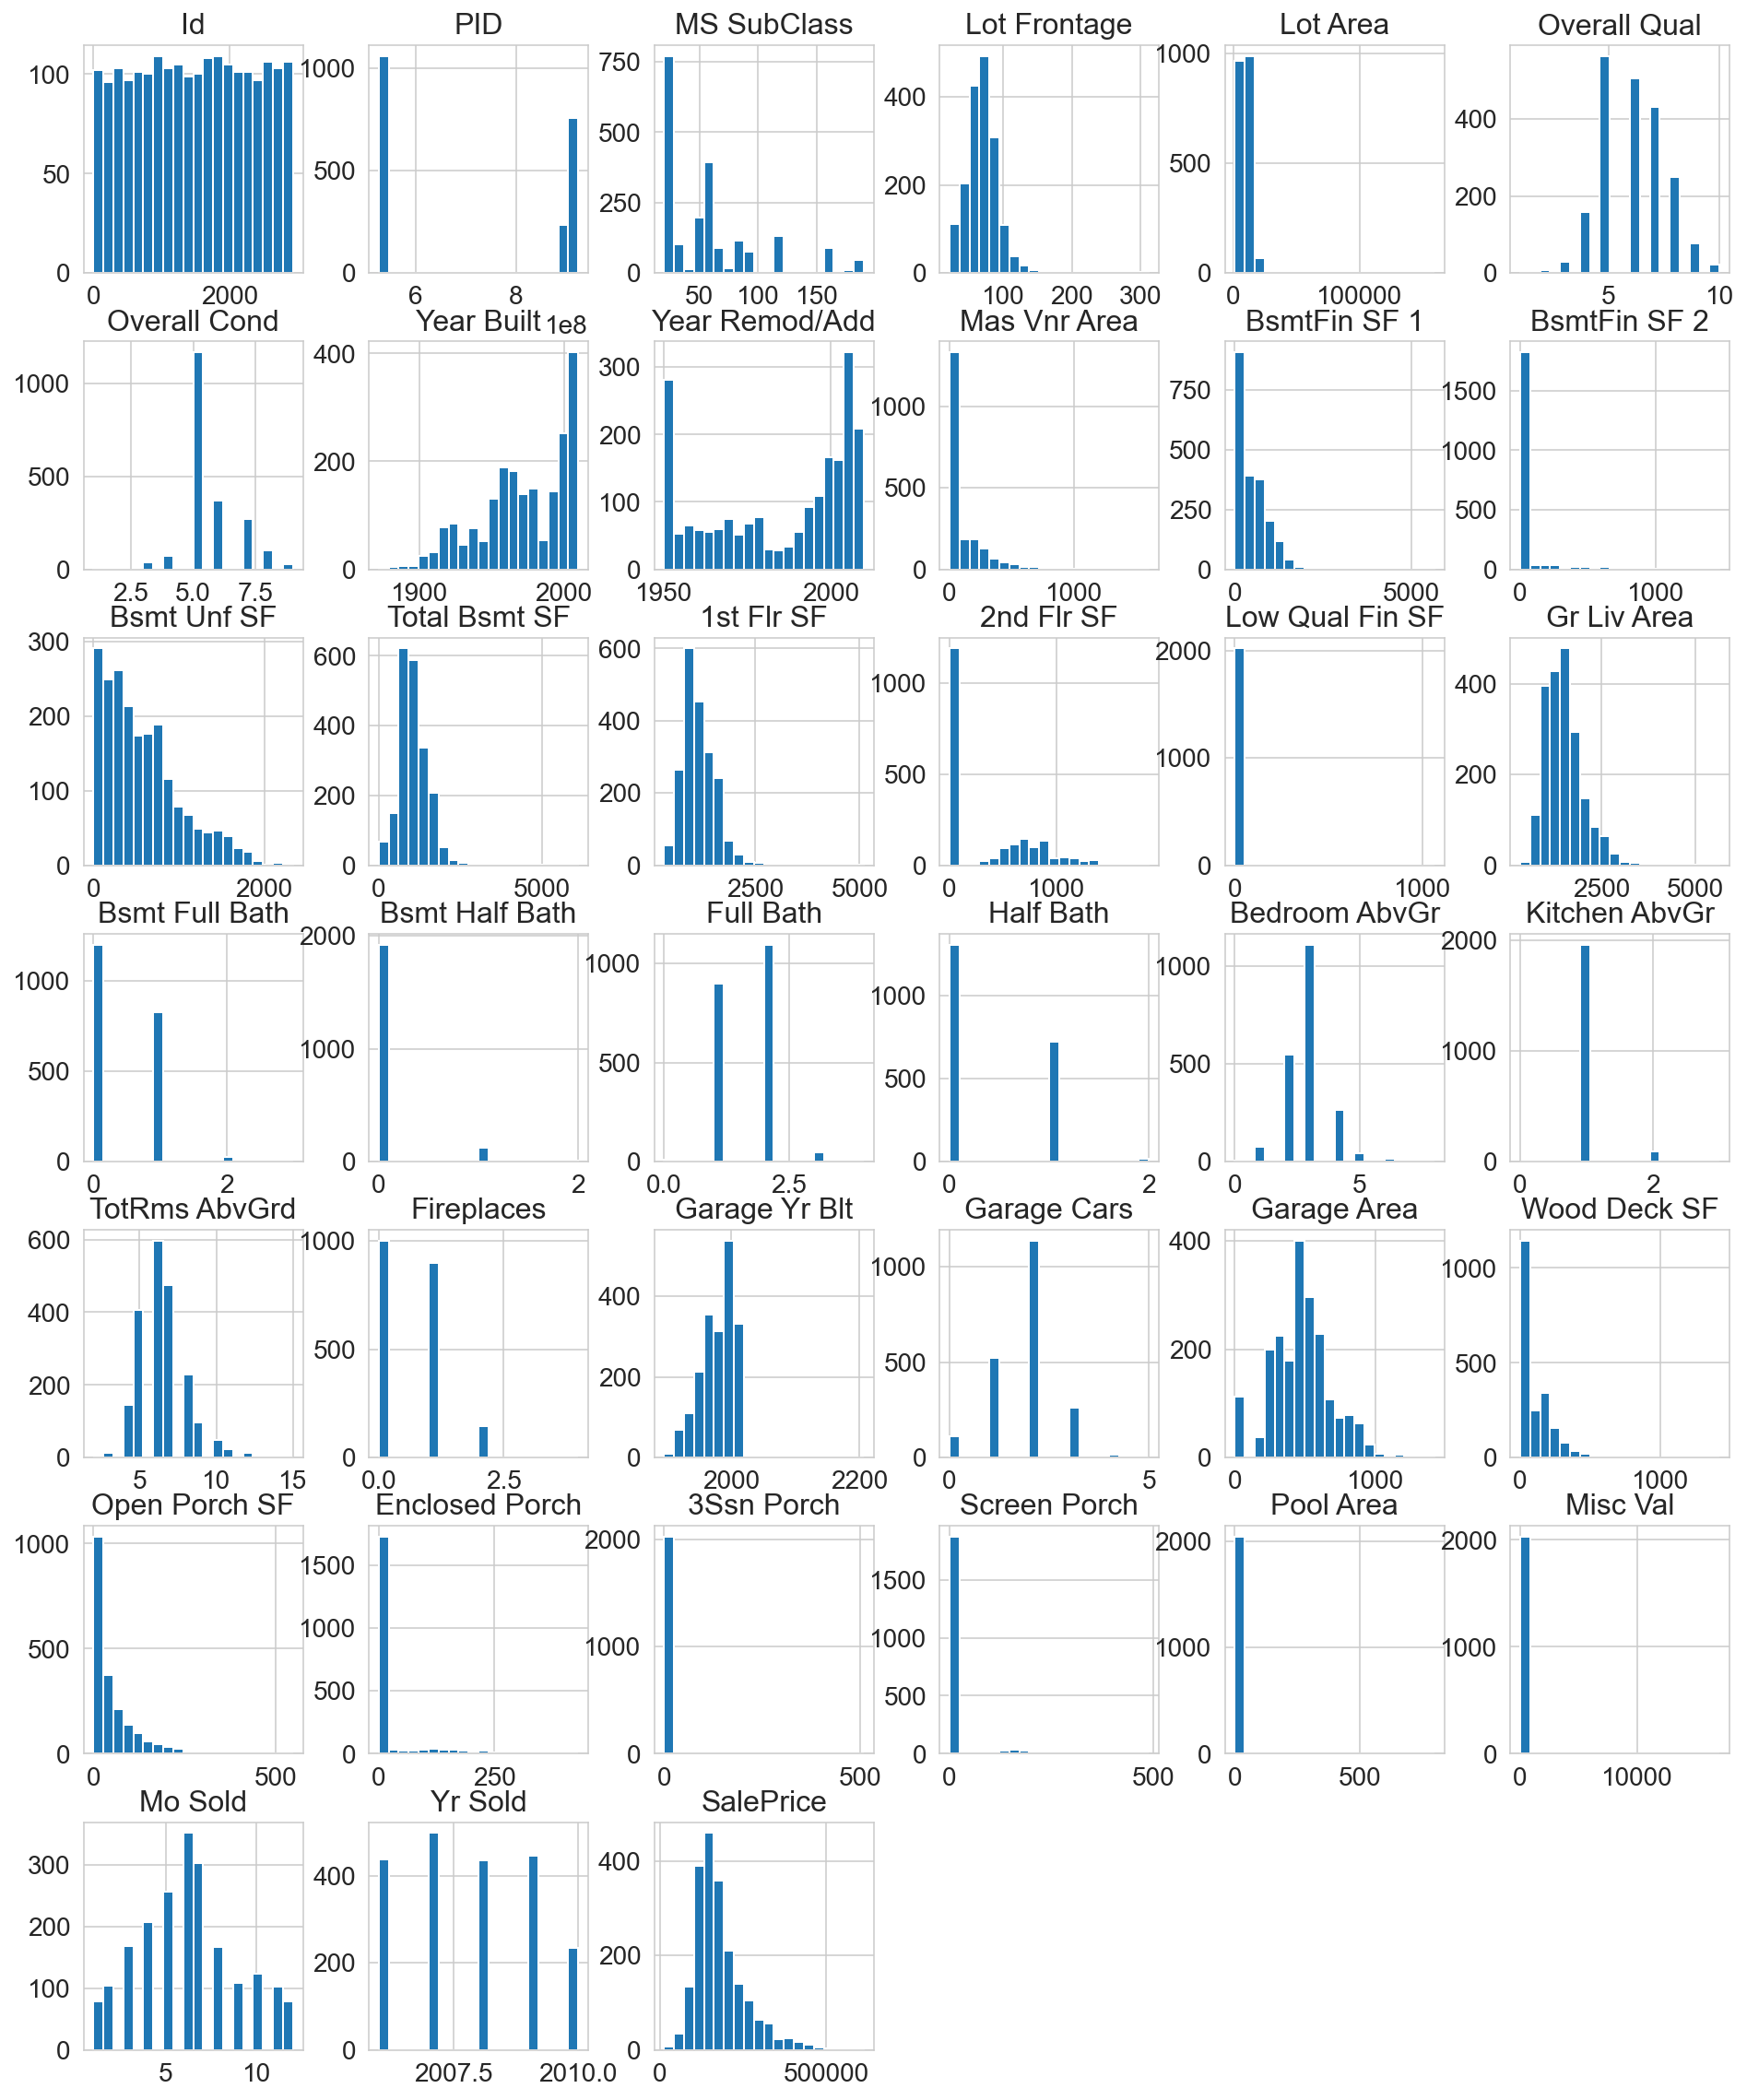

In [23]:
# Plot histograms for the numerical data
df.select_dtypes(['int64', 'float']).hist(figsize=(16, 20), bins=20);

Glancing at the histograms above, the following new info can be extracted about the nature of some of the features:

- _Lot Area_: it is highly right-skewed as it seems to have outliers
- _Overall Qual & Overall Cond_: discrete ordinal rating data
- _SalePrice_: follows a normal distribution with slight positive skew
- _Kitchen AbvGr_: can be dropped as most of the properties have same values
- _Bedroom AbvGr_: can also be dropped because it is already included in the _TotRms AbvGrd_

In [24]:
# Add Kitchen AbvGr & Bedroom AbvGr to drop_cols
drop_cols.extend(['Kitchen AbvGr', 'Bedroom AbvGr'])

# Add the features interested in to explore to selected_cols
selected_cols.extend(['Lot Area', 'Overall Qual', 'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'Open Porch SF'])

In [25]:
# Print the percent share of column values that are 0
def get_zero_freq(col):
    return round(col[col == 0.0].count()/col.count() * 100, 1)

df.select_dtypes(['int64', 'float']).apply(get_zero_freq).sort_values().tail(25)

Overall Qual        0.0
Lot Area            0.0
Kitchen AbvGr       0.1
Bedroom AbvGr       0.2
Full Bath           0.4
Total Bsmt SF       2.6
Garage Area         5.5
Garage Cars         5.5
Bsmt Unf SF         8.0
BsmtFin SF 1       32.0
Open Porch SF      44.5
Fireplaces         48.8
Wood Deck SF       52.4
2nd Flr SF         58.1
Bsmt Full Bath     58.6
Mas Vnr Area       59.9
Half Bath          63.8
Enclosed Porch     84.1
BsmtFin SF 2       88.0
Screen Porch       91.2
Bsmt Half Bath     93.9
Misc Val           96.8
Low Qual Fin SF    98.4
3Ssn Porch         98.7
Pool Area          99.6
dtype: float64

1. _3Ssn Porch, Low Qual Fin SF, Misc Val, Screen Porch, Enclosed Porch_ all have more than $80\%$ of the values as 0. Can drop these as they will not have any significant effect on the model training. Add to `drop_cols`.
2. _Wood Deck SF_ has more than $50\%$ of values as 0, meaning no wood deck. This can be replaced by a new column _Has Wood Deck_ (operation performed [here](#3.1-Cleaning-operations-on-the-DataFrame) in `get_clean_df()` function), a binary that is 0 for no wood deck and 1 if the property has wood deck. After converting to binary, drop the column _Wood Deck SF_.

In [26]:
selected_cols.append('Has Wood Deck')
drop_cols.extend(['3Ssn Porch',
                  'Low Qual Fin SF',
                  'Misc Val',
                  'Screen Porch',
                  'Enclosed Porch',
                  'Wood Deck SF'])

Feature sets like
- _1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area_
- _BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF_
- _Bsmt Half Bath, Half Bath, Bsmt Full Bath, Full Bath_

can be combined into a single value.

**Total area above ground & in basement**

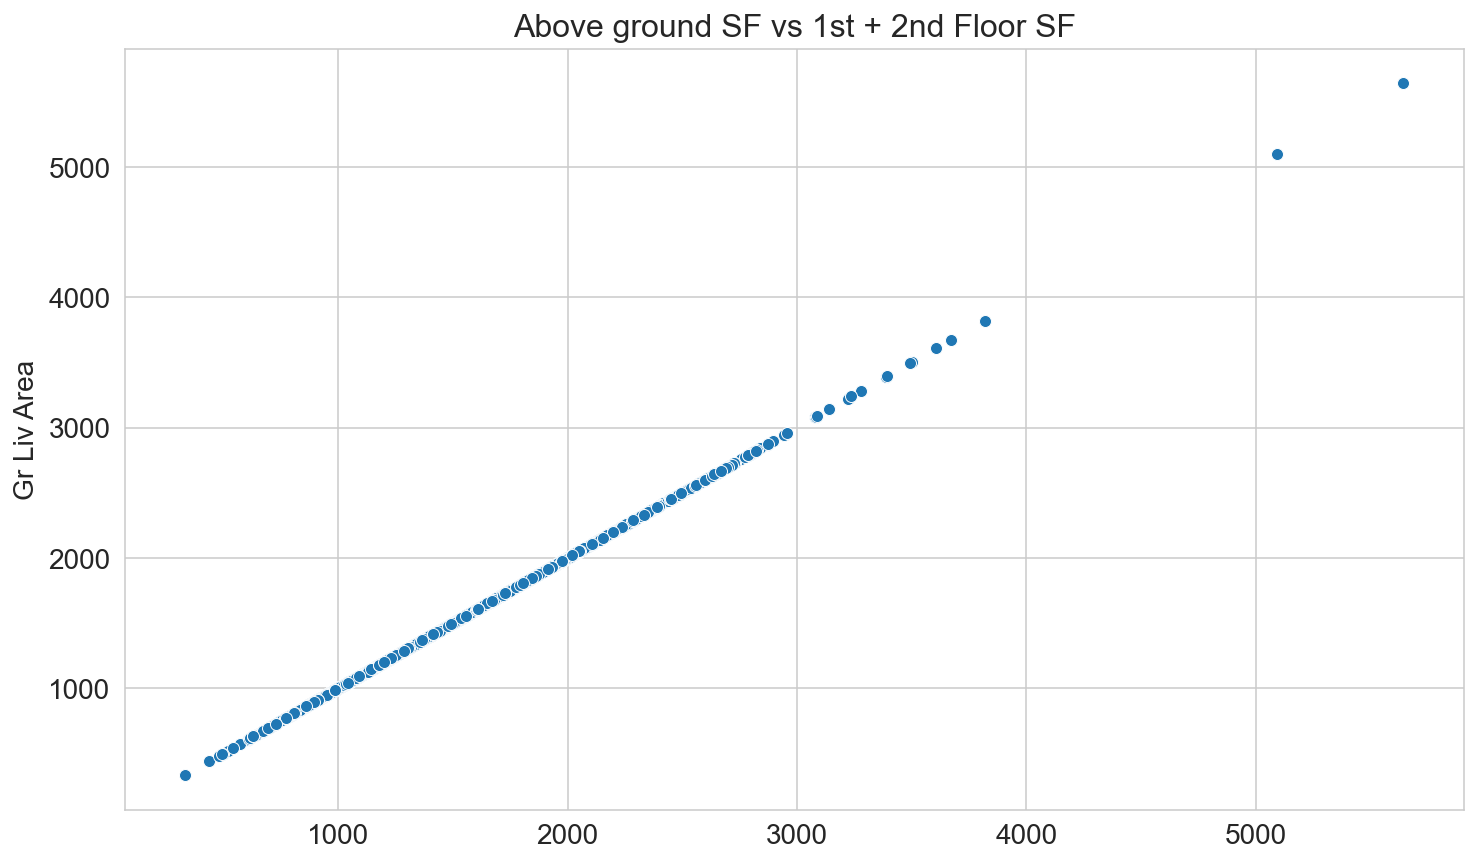

In [27]:
# Plot the sum of 1st and 2nd floor areas vs Gr Liv Area
plt.figure(figsize=(12, 7))
plt.title('Above ground SF vs 1st + 2nd Floor SF')
sns.scatterplot(x=(df['1st Flr SF'] + df['2nd Flr SF'] + df['Low Qual Fin SF']), y=df['Gr Liv Area']);

Plotting a scatter plot between the sum of _1st Flr SF, 2nd Flr SF and Low Qual Fin SF_ vs _Gr Liv Area_ shows a perfect linear relationship, and thus it can be deduced that the former three features are already included in the latter. So we consider _Gr Liv Area_ but remove the other three to avoid multicollinearity. Additionally, we remove the outliers above $4000$ [here](#3.1-Cleaning-operations-on-the-DataFrame) in `get_clean_df()` function.

In [28]:
drop_cols.extend(['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF'])

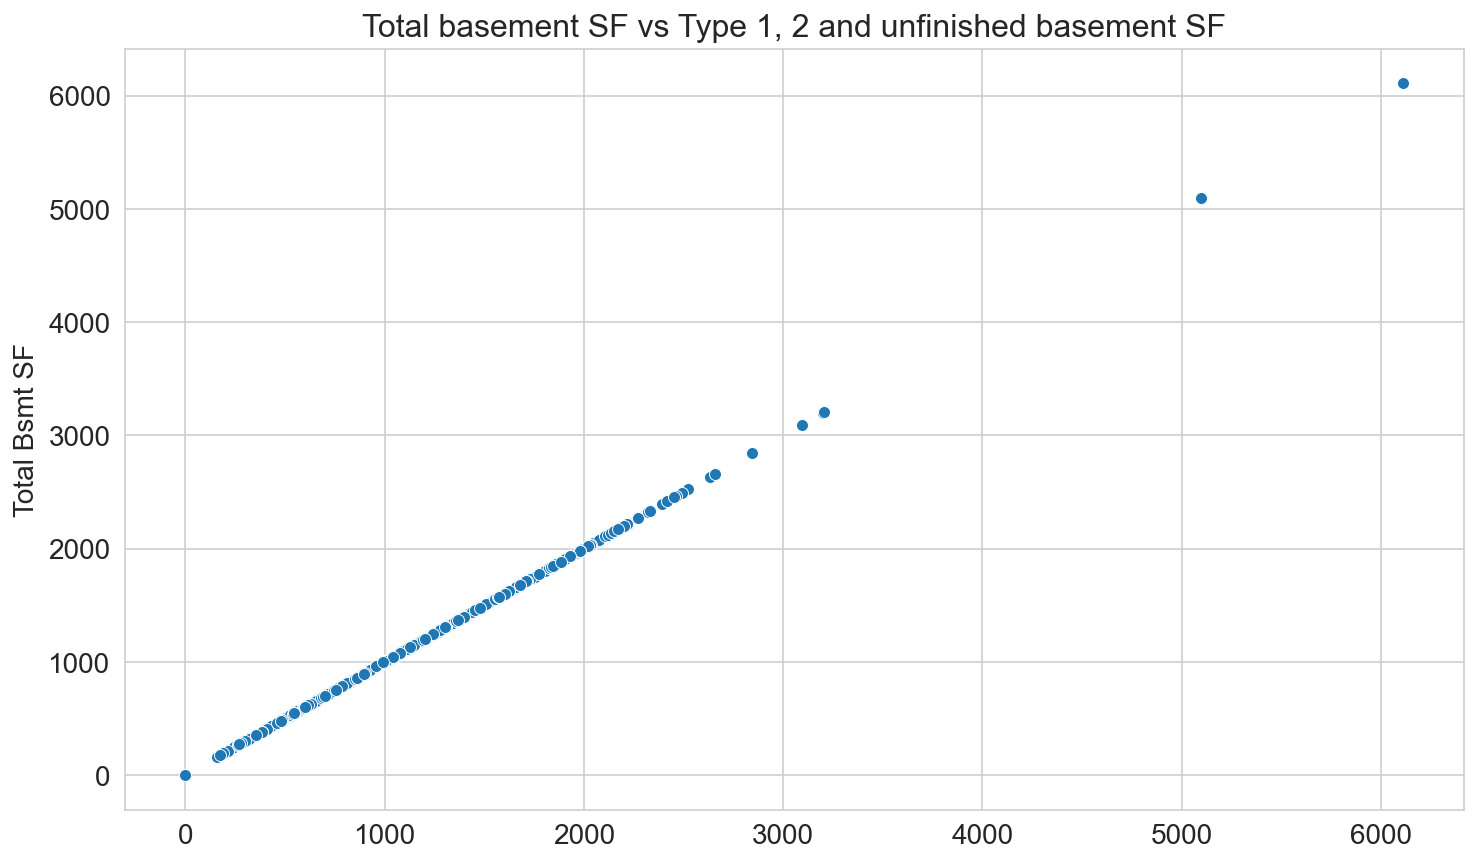

In [29]:
# Plot a similar graph for the basement features
plt.figure(figsize=(12, 7))
plt.title('Total basement SF vs Type 1, 2 and unfinished basement SF')
sns.scatterplot(x=(df['BsmtFin SF 1'] + df['BsmtFin SF 2'] + df['Bsmt Unf SF']), y=df['Total Bsmt SF']);

This shows that the sum of _BsmtFin SF 1, BsmtFin SF 2 and Bsmt Unf SF_ is equal to _Total Bsmt SF_, so we include the latter but drop the former three features. We also remove the outliers above $4000$ in `get_clean_df()` function in this [section](#3.1-Cleaning-operations-on-the-DataFrame).

In [30]:
drop_cols.extend(['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'])

**Total rooms & baths in the property**

In [31]:
total_rooms = df[['TotRms AbvGrd', 'Bsmt Half Bath', 'Half Bath', 'Bsmt Full Bath', 'Full Bath']].T.sum()

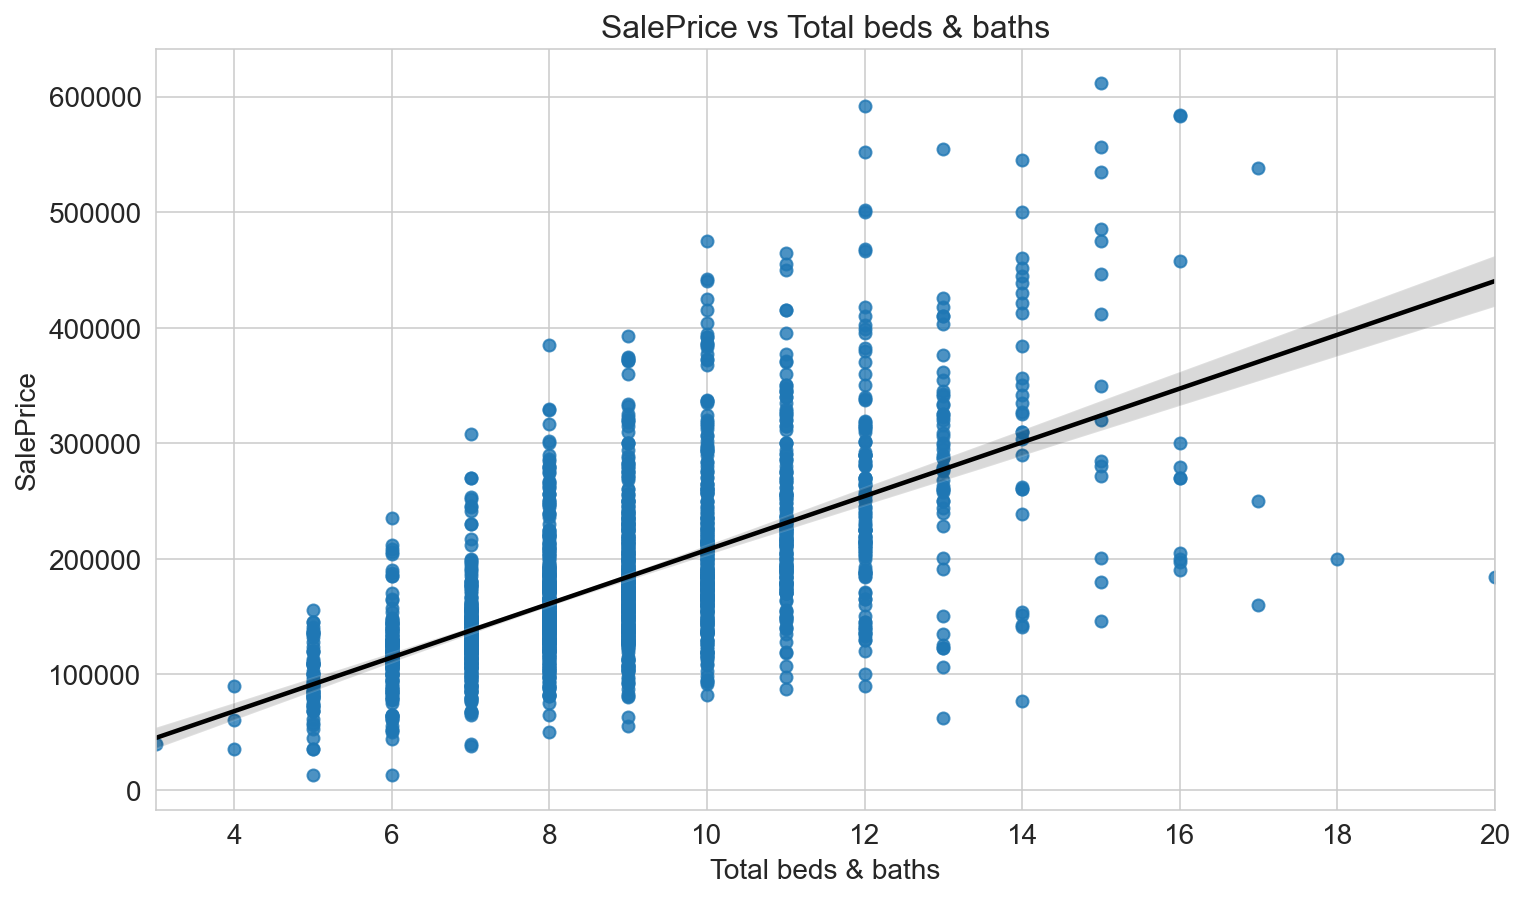

In [32]:
# Plot the total rooms in the entire property (beds and baths) vs Sale price
plt.figure(figsize=(12, 7))
plt.title('SalePrice vs Total beds & baths')
sns.regplot(x=total_rooms, y=df['SalePrice'], line_kws={"color": "black"})
plt.xlabel('Total beds & baths');

Adding up all bedrooms and bathrooms in the property to condense all the info into a single column, _TotalBedsNBaths_. It is a discrete value but is clearly linear in nature with _SalePrice_. So the columns added [here](#3.1-Cleaning-operations-on-the-DataFrame) in `get_clean_df()` function. Then remove the original columns.

In [33]:
selected_cols.append('TotalBedsNBaths')
drop_cols.extend(['TotRms AbvGrd', 'Bsmt Half Bath', 'Half Bath', 'Bsmt Full Bath', 'Full Bath'])

**Year built vs Year sold**

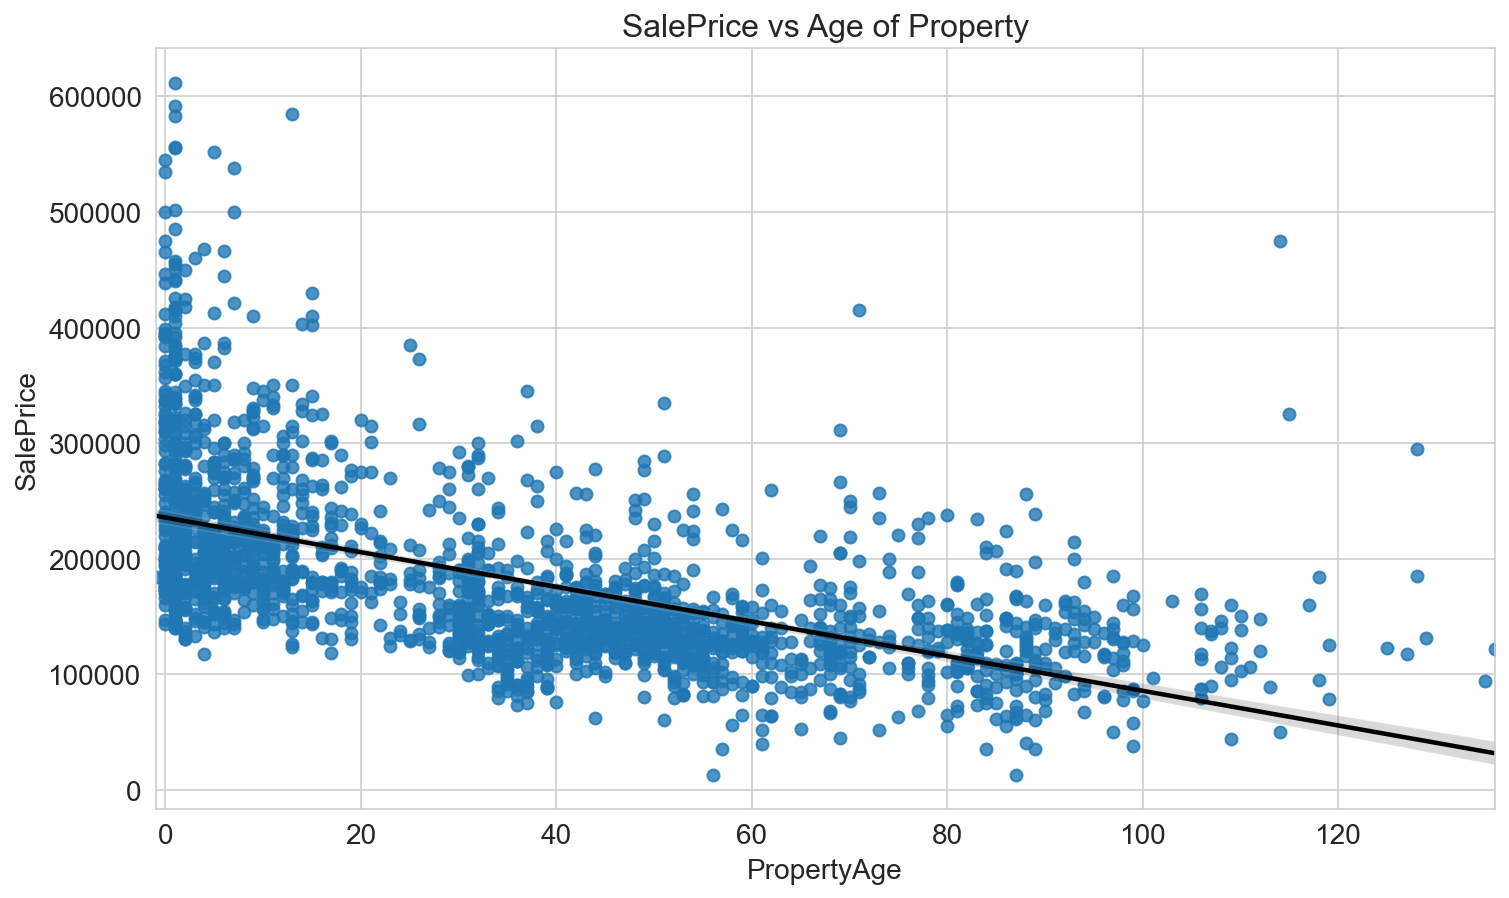

In [34]:
# Plot the SalePrice vs age of property (year sold - year built)
plt.figure(figsize=(12, 7))
plt.title('SalePrice vs Age of Property')
sns.regplot(x=(df['Yr Sold'] - df['Year Built']), y=df['SalePrice'], line_kws={"color": "black"})
plt.xlabel('PropertyAge');

From the `describe()` call above, we can see that the data available is for sales made since the year 2006. The `regplot` above depicts that the property's _SalePrice_ is inversely proportional to it age (_Year sold - Year built_), i.e., the property prices goes down older the property. This seems counter-intuitive, at first, but many other factors go into deciding the final _Saleprice_. For this case, thus, we will use the _PropertyAge_ as a feature calculated from _Yr Sold & Year Built_ (actual operation performed [here](#3.1-Cleaning-operations-on-the-DataFrame) in `get_clean_df()` function.).

In [35]:
selected_cols.append('PropertyAge')
drop_cols.extend(['Yr Sold', 'Year Built'])

**Year Remod/Add**

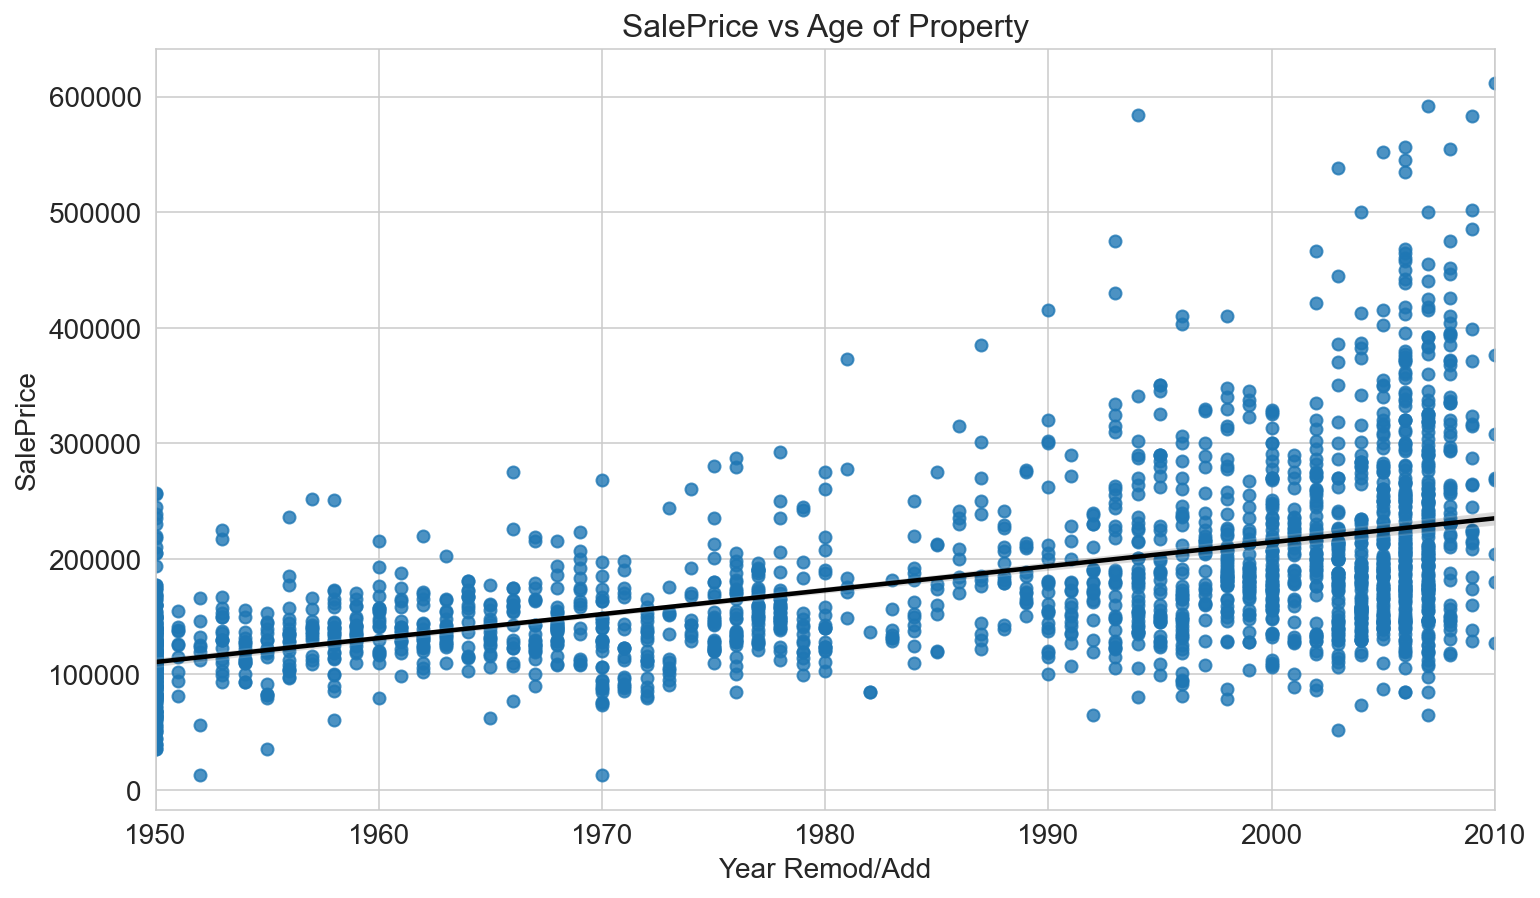

In [36]:
# Plot the SalePrice vs Year Remod/Add
plt.figure(figsize=(12, 7))
plt.title('SalePrice vs Age of Property')
sns.regplot(x=(df['Year Remod/Add']), y=df['SalePrice'], line_kws={"color": "black"})
plt.xlabel('Year Remod/Add');

The distribution is not uniform nor clearly linear, we drop this column for now.

In [37]:
# Drop the Year Remod/Add
drop_cols.append('Year Remod/Add')

**Outliers in Lot Area**

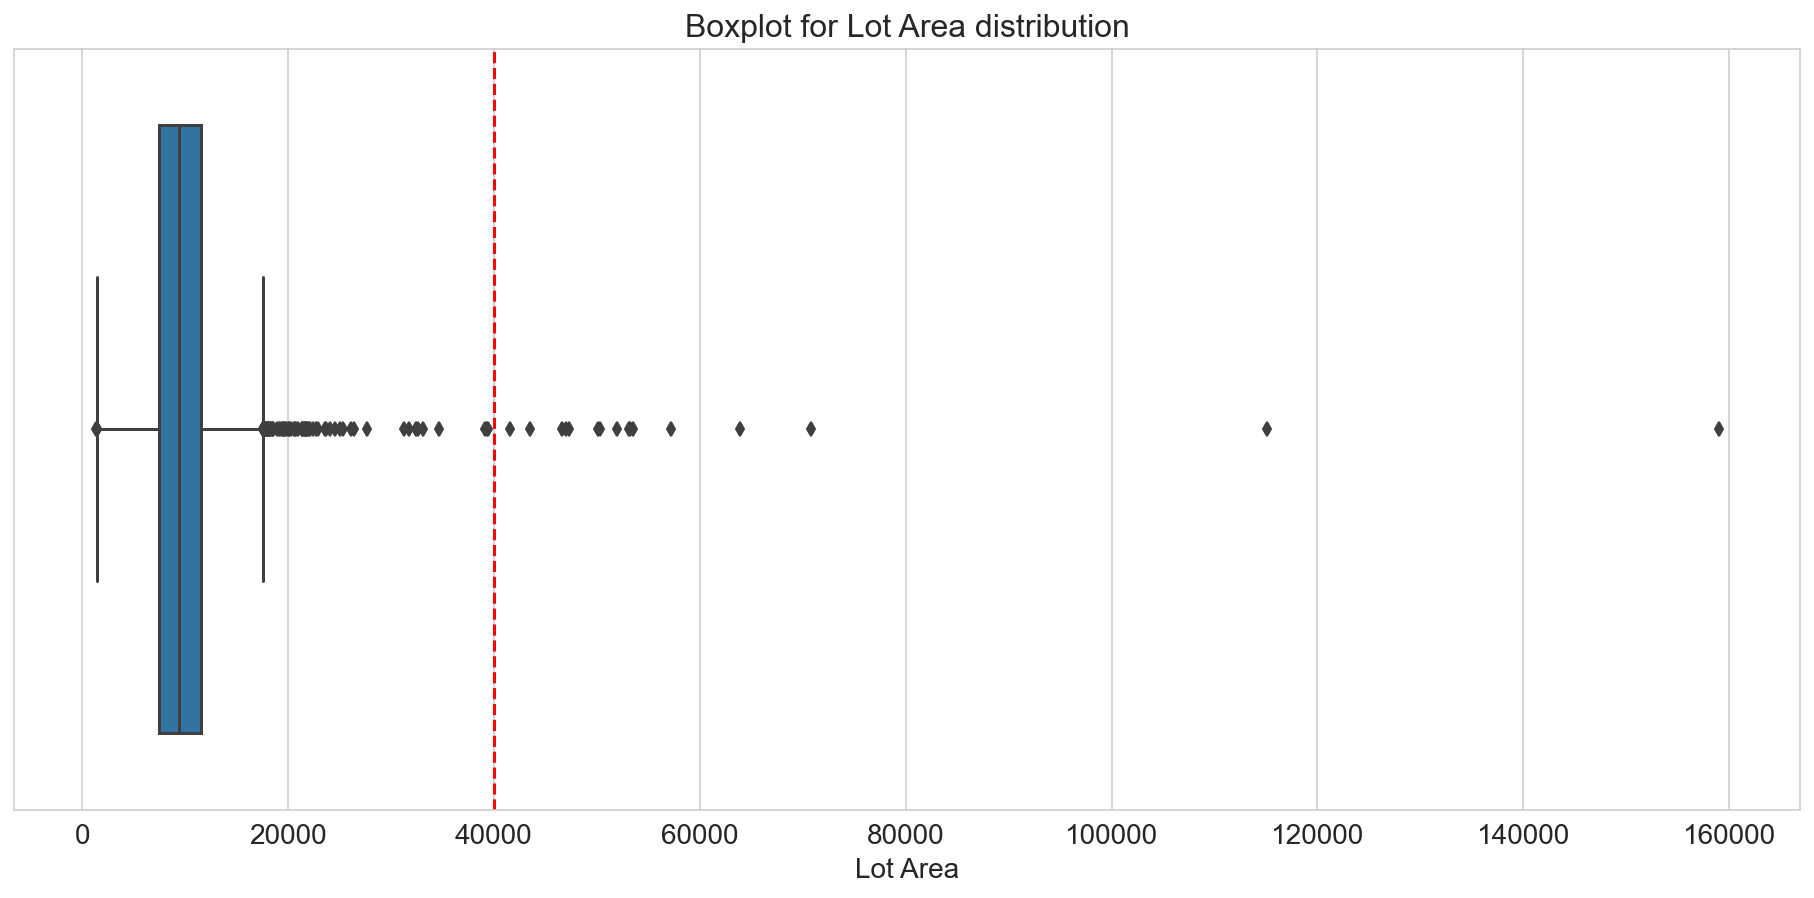

In [38]:
# Plot a box plot to visually see the distribution
plt.figure(figsize=(16, 7))
plt.title('Boxplot for Lot Area distribution')
sns.boxplot(x=df['Lot Area'])
plt.axvline(x=40000, color='red', linestyle='--')

Clearly there are many outliers in the _Lot Area_.

In [39]:
# Get the Lot Area values above 40000 in the column
df[df['Lot Area'] > 40000]['Lot Area'].count()

16

Since there aren't many properties (16/2051 < $1\%$) with _Lot Area_ more than 40000, we can remove the rows with values above it. This is done in the `get_clean_df()` function [here](#3.1-Cleaning-operations-on-the-DataFrame).

**Garage Cars vs Garage Area**

The _Garage Cars and Garage Area_ can be related as the number of cars a garage holds is proportional to its area. This can be converted to intereaction column.

In [40]:
# Correlation between the Garage Cars and Garage Area
df[['Garage Cars', 'Garage Area']].corr()

,Garage Cars,Garage Area
Garage Cars,1.00000,0.89318
Garage Area,0.89318,1.00000


As expected the correlation is highly positive and these two can be combined into a single interaction term in `get_clean_df()` function.

In [41]:
selected_cols.append('GarageCarsNArea')
drop_cols.extend(['Garage Cars', 'Garage Area'])

### 2.3 Numerical feature correlation with SalePrice

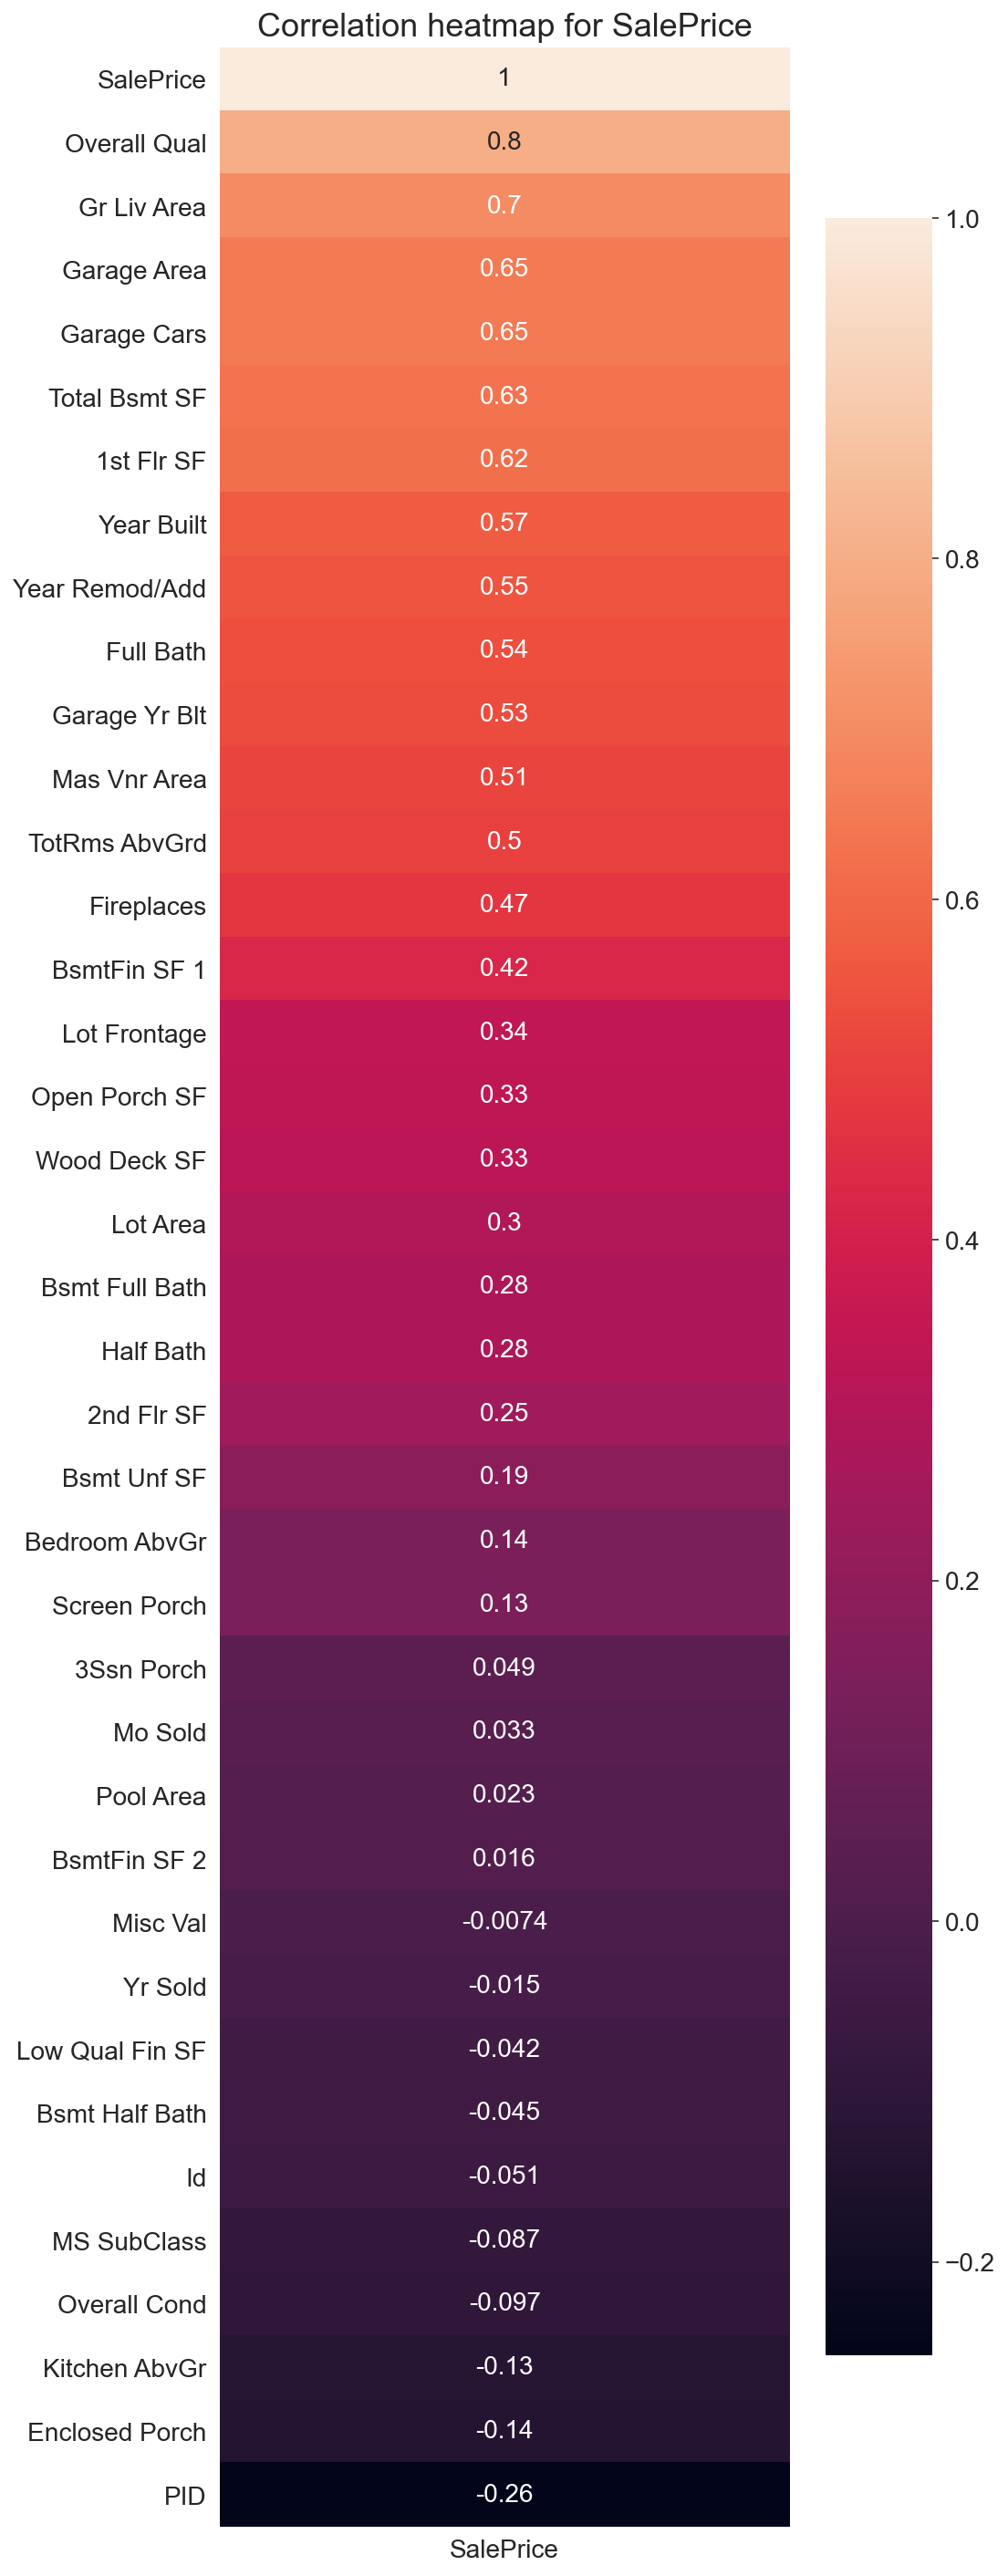

In [42]:
# Plot a heatmap for Numerical features that affect SalePrice
plt.figure(figsize=(7, 25))
plt.title('Correlation heatmap for SalePrice', fontdict={'fontsize':18})
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True);

The features with high correlation, of $\ge50\%$, with _SalePrice_ are of interest, namely:
- _Overall Qual_: Its an ordinal feature which can be transformed and it has very high positive correlation to _SalePrice_
- _Gr Liv Area, 1st Flr SF, Total Bsmt SF_: A continuous variable with positive skew, can be checked for outliers
- _Garage Cars, Year Built, Year Remod/Add, Full Bath, Garage Yr Sold, TotRms AbvGrd, Msn Vnr Type_: These are all discrete values which can be merged/transformed depending on individual criteria.

From the remaining features:
- _Lot Area_ will be considered as it should have a direct impact on the _SalePrice_
- _Overall Cond_: does not have a strong correlation with either _SalePrice or Overall Qual_, so we drop it
- _Fireplaces_ is replaced by column _HasFireplace_ as a binary value

In [43]:
# Add Overall Cond to drop_cols
drop_cols.append('Overall Cond')

### 2.4 What about the categorical columns?

In [44]:
df.select_dtypes(['object']).nunique().sort_values()

Street             2
Alley              2
Central Air        2
Garage Finish      3
Utilities          3
Land Slope         3
Paved Drive        3
Mas Vnr Type       4
Bsmt Exposure      4
Pool QC            4
Fence              4
Kitchen Qual       4
Land Contour       4
Lot Shape          4
Exter Qual         4
Electrical         5
Heating QC         5
Heating            5
Bsmt Cond          5
Bsmt Qual          5
Fireplace Qu       5
Exter Cond         5
Garage Qual        5
Garage Cond        5
Bldg Type          5
Lot Config         5
Misc Feature       5
Garage Type        6
BsmtFin Type 1     6
BsmtFin Type 2     6
Roof Matl          6
Roof Style         6
Foundation         6
MS Zoning          7
House Style        8
Condition 2        8
Functional         8
Condition 1        9
Sale Type          9
Exterior 2nd      15
Exterior 1st      15
Neighborhood      28
dtype: int64

From the numbers above, we can see that many of the categorical features mostly have few values, of which one is dominant. We will remove all columns where about $80\%~90\%$ of the _mode_ value is repeated.

In [45]:
# Print the rate at which the most frequent value in a column appears
def get_value_freq(col):
    return round(col.value_counts()[0]/col.count() * 100, 1)

df.select_dtypes(['object']).apply(get_value_freq).sort_values()

Neighborhood      15.1
BsmtFin Type 1    30.8
Exterior 2nd      35.2
Exterior 1st      35.3
Garage Finish     43.8
Bsmt Qual         44.4
Pool QC           44.4
Foundation        45.1
Fireplace Qu      49.8
Kitchen Qual      51.0
House Style       51.6
Heating QC        51.9
Fence             56.8
Mas Vnr Type      60.0
Alley             60.7
Exter Qual        60.8
Garage Type       62.6
Lot Shape         63.1
Bsmt Exposure     67.2
Lot Config        73.3
MS Zoning         77.9
Roof Style        78.9
Bldg Type         82.9
Condition 1       86.2
Misc Feature      86.2
Exter Cond        86.7
Sale Type         86.8
BsmtFin Type 2    87.7
Land Contour      89.9
Paved Drive       90.7
Electrical        91.1
Bsmt Cond         91.9
Central Air       93.1
Functional        93.4
Garage Qual       94.6
Land Slope        95.2
Garage Cond       96.4
Heating           98.4
Condition 2       98.7
Roof Matl         98.7
Street            99.7
Utilities         99.9
dtype: float64

**Neighborhood**

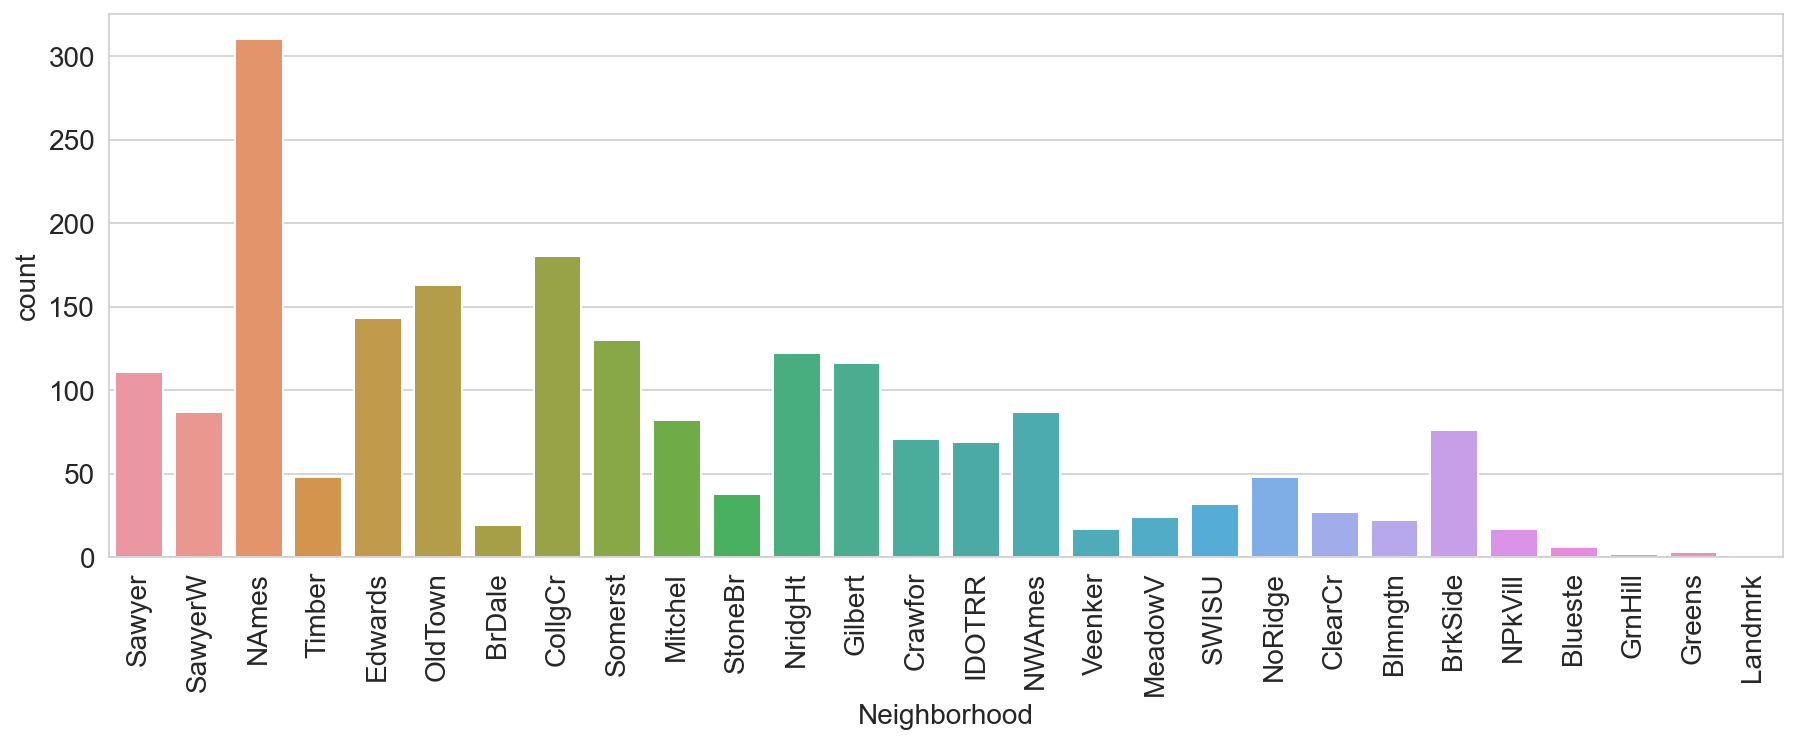

In [46]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=df['Neighborhood']);

In [47]:
# Calculate the mean SalePrice for each neighborhood
df.groupby(by='Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

Neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    130493.468531
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: SalePrice, dtype: float64

The top three neighbohoods in terms of number of property sales are - NAmes, CollgCr and OldTown. We add binary columns for these three and add the remaining to Others column in `get_clean_df()` function.

In [48]:
selected_cols.extend(['NH_NAmes', 'NH_CollgCr', 'NH_OldTown', 'NH_Others'])
drop_cols.append('Neighborhood')

In [49]:
# Barplot with SalePrice and countplot for the feature
def plot_vs_saleprice(feature):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    sns.barplot(x=df[feature], y=df['SalePrice'], ax=ax[0])
    sns.countplot(x=df[feature], ax=ax[1]);

**Month Sold**

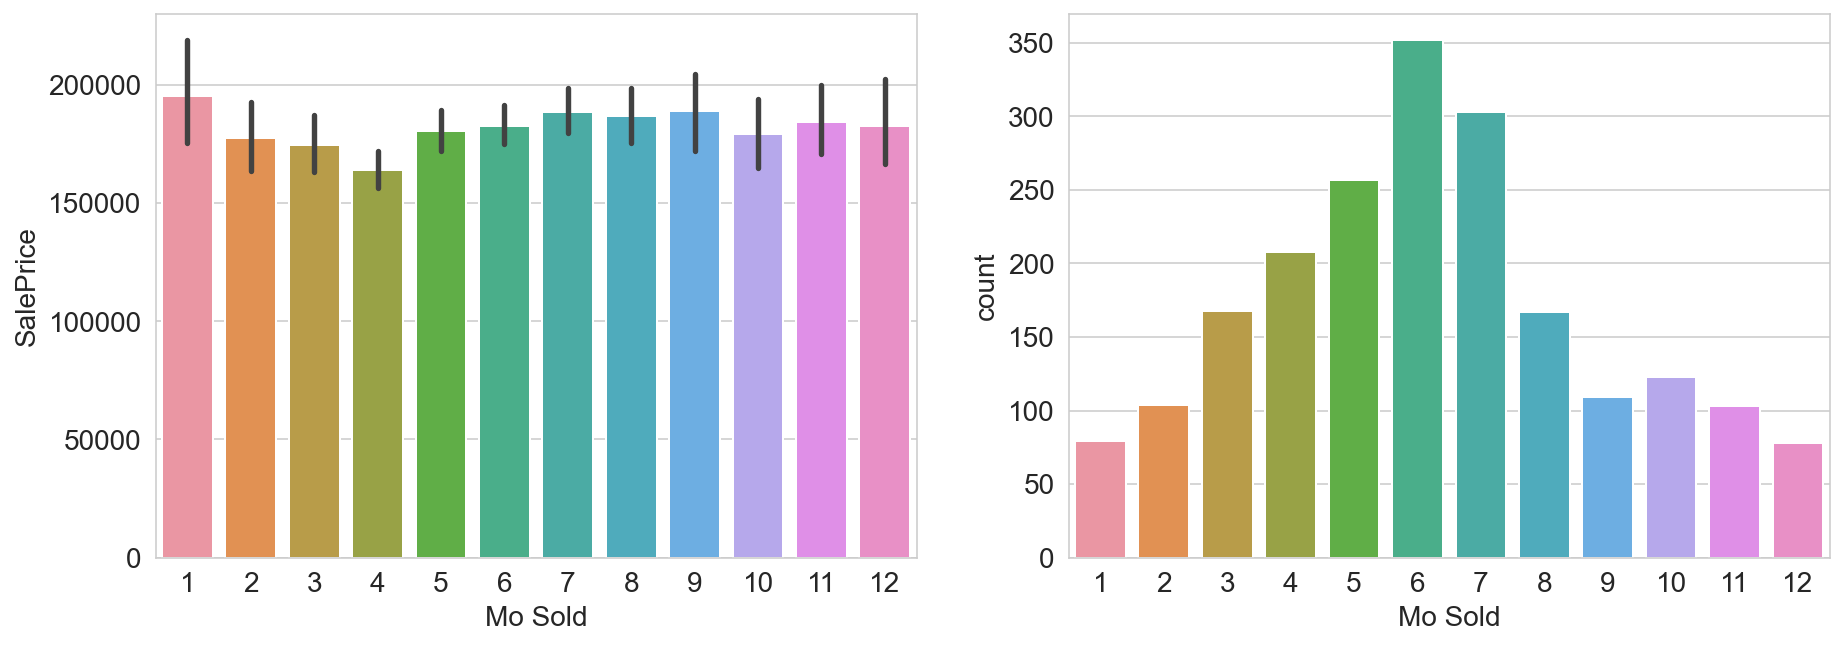

In [50]:
plot_vs_saleprice('Mo Sold')

Even though more sales happend during summer months, the variance in saleprice is not much across the month of sale of the property. Drop now but keep for future evaluation.

In [51]:
drop_cols.append('Mo Sold')

**MS SubClass**

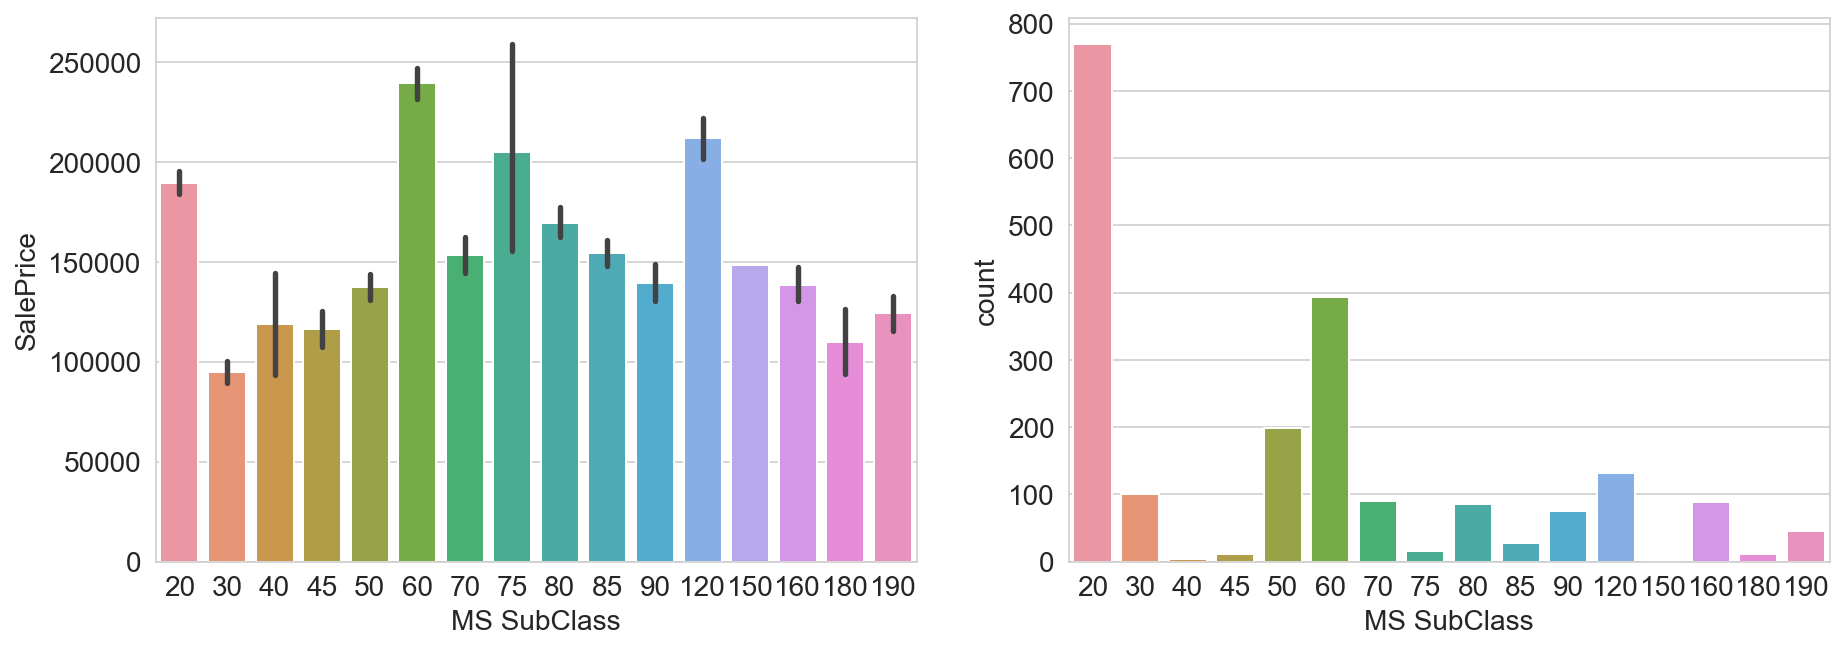

In [52]:
plot_vs_saleprice('MS SubClass')

The type of dwelling under sale could be an important factor in determining sale price, however, we can consider this later with other features. This closely matches the _House Style_.

In [53]:
drop_cols.append('MS SubClass')

**Garage Features**

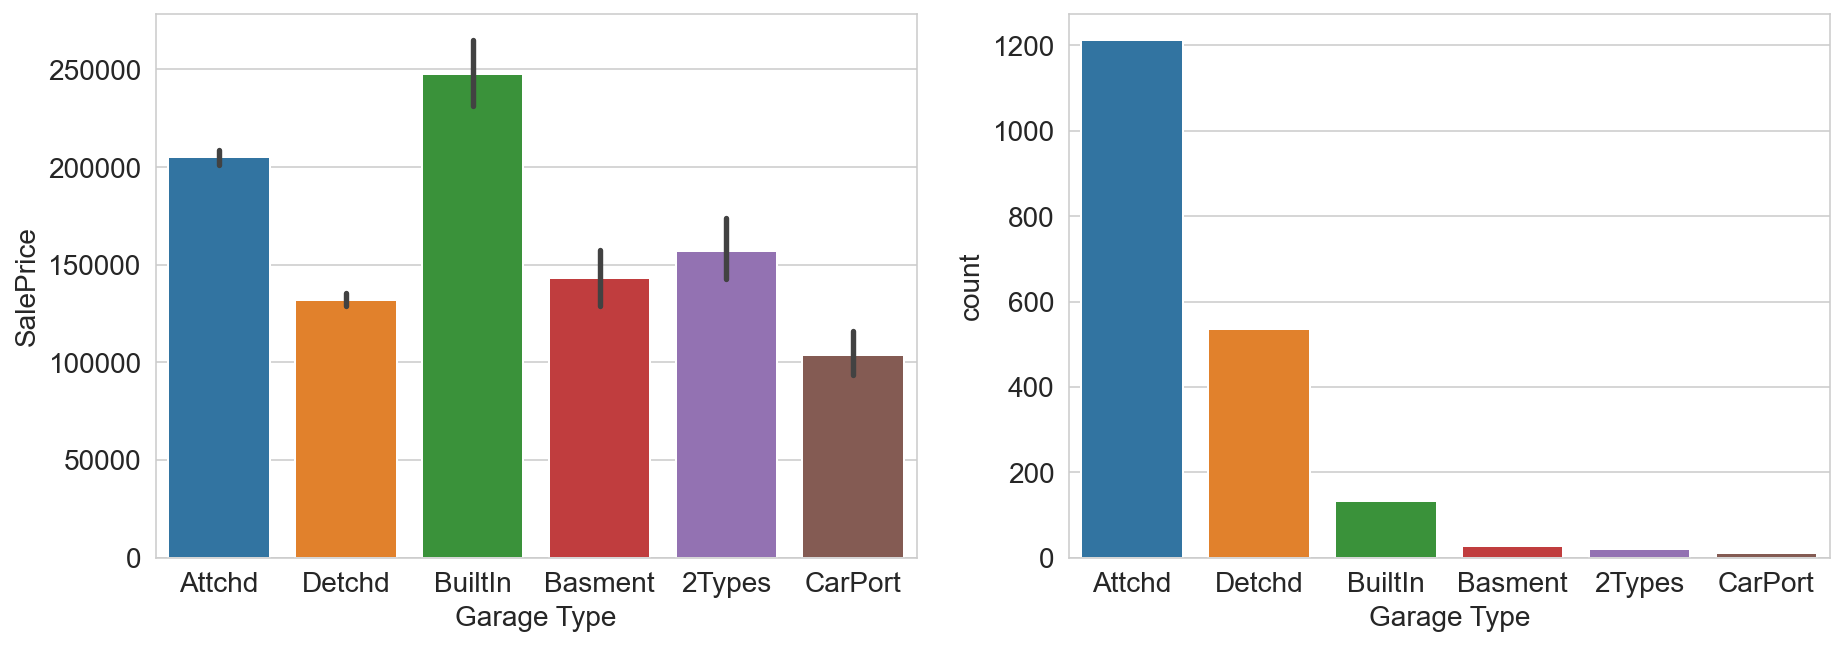

In [54]:
plot_vs_saleprice('Garage Type')

In [55]:
df['Garage Type'].isna().sum()

113

We can create a binary column if the _Garage Type_ is Attchd or Detchd, as they are mutually exclusive and we can ignore others. The step is listed in `get_clean_df()` function. The columns where info is unavailable can be NA, meaning the property does not have a garage as we know from the data dictionary. Replace the NaNs with NA so we don't count them in Attchd and Detchd.

In [56]:
# create a list to replace NaNs with NA
nan_to_na_cols = ['Garage Type']

In [57]:
selected_cols.append('GarageAttached')
drop_cols.append('Garage Type')

In [58]:
df['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

The missing values are NaNs but from the dictionary we know that they are NAs which means, no garage.

**Garage Qual and Garage Cond**

In [59]:
df['Garage Qual'].value_counts(normalize=True)

TA    0.945792
Fa    0.042334
Gd    0.009293
Ex    0.001549
Po    0.001033
Name: Garage Qual, dtype: float64

In [60]:
df['Garage Cond'].value_counts(normalize=True)

TA    0.964378
Fa    0.024264
Gd    0.006195
Po    0.004130
Ex    0.001033
Name: Garage Cond, dtype: float64

Most of the properties have similar _Garage Qual_ and _Garage Cond_ ratings. So, we can drop these garage related features along with _Garage Yr Blt_ as it might not have such an impact on the price of the property.

In [61]:
# Drop all the garage related features that are not requried
drop_cols.extend(['Garage Qual', 'Garage Cond', 'Garage Yr Blt', 'Garage Finish'])

**Basement Quality**

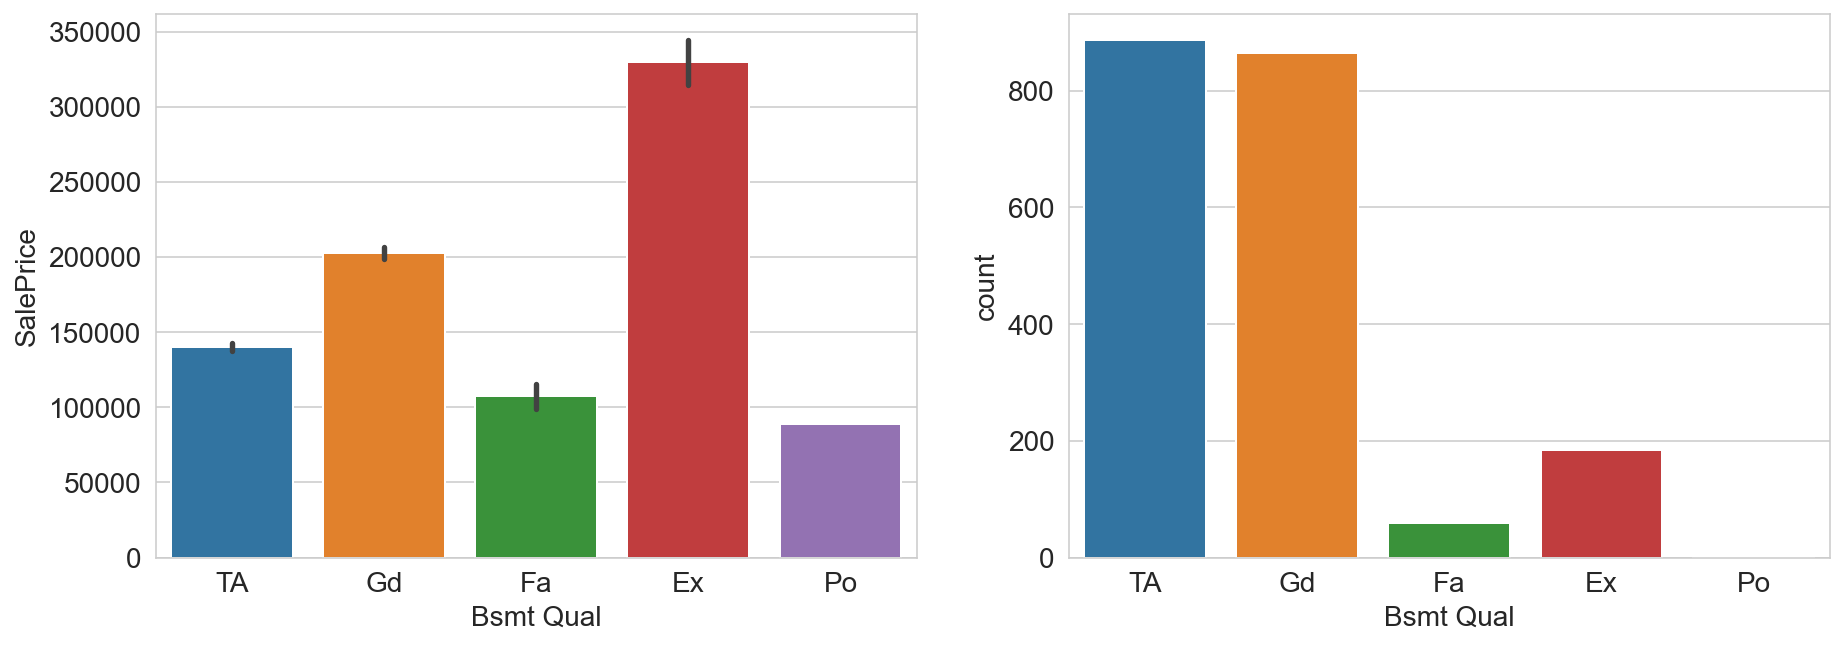

In [62]:
plot_vs_saleprice('Bsmt Qual')

Properties with good quality basement fetch more sale price, and since it is an ordinal feature, we can convert the quality ratings to equivalent values for model training. Add this to the `ordinal_cols`.

In [63]:
ordinal_cols.append('Bsmt Qual')
selected_cols.append('Bsmt Qual')

**Foundation**

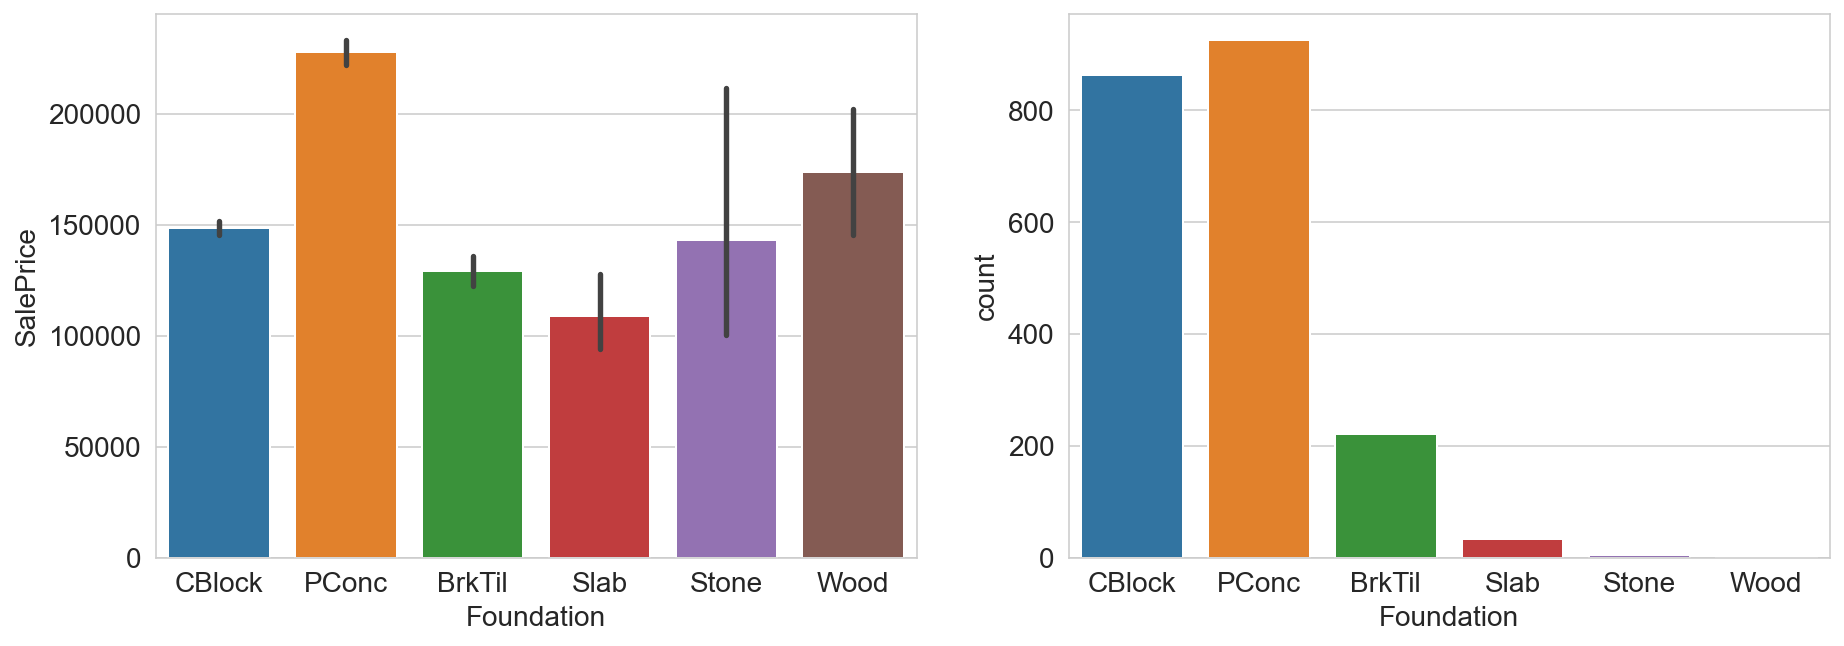

In [64]:
plot_vs_saleprice('Foundation')

The price difference between the two common types of foundations is large enough that we should consider for model training by adding three new columns for the top three types of foundations.

**Kitchen Qual**

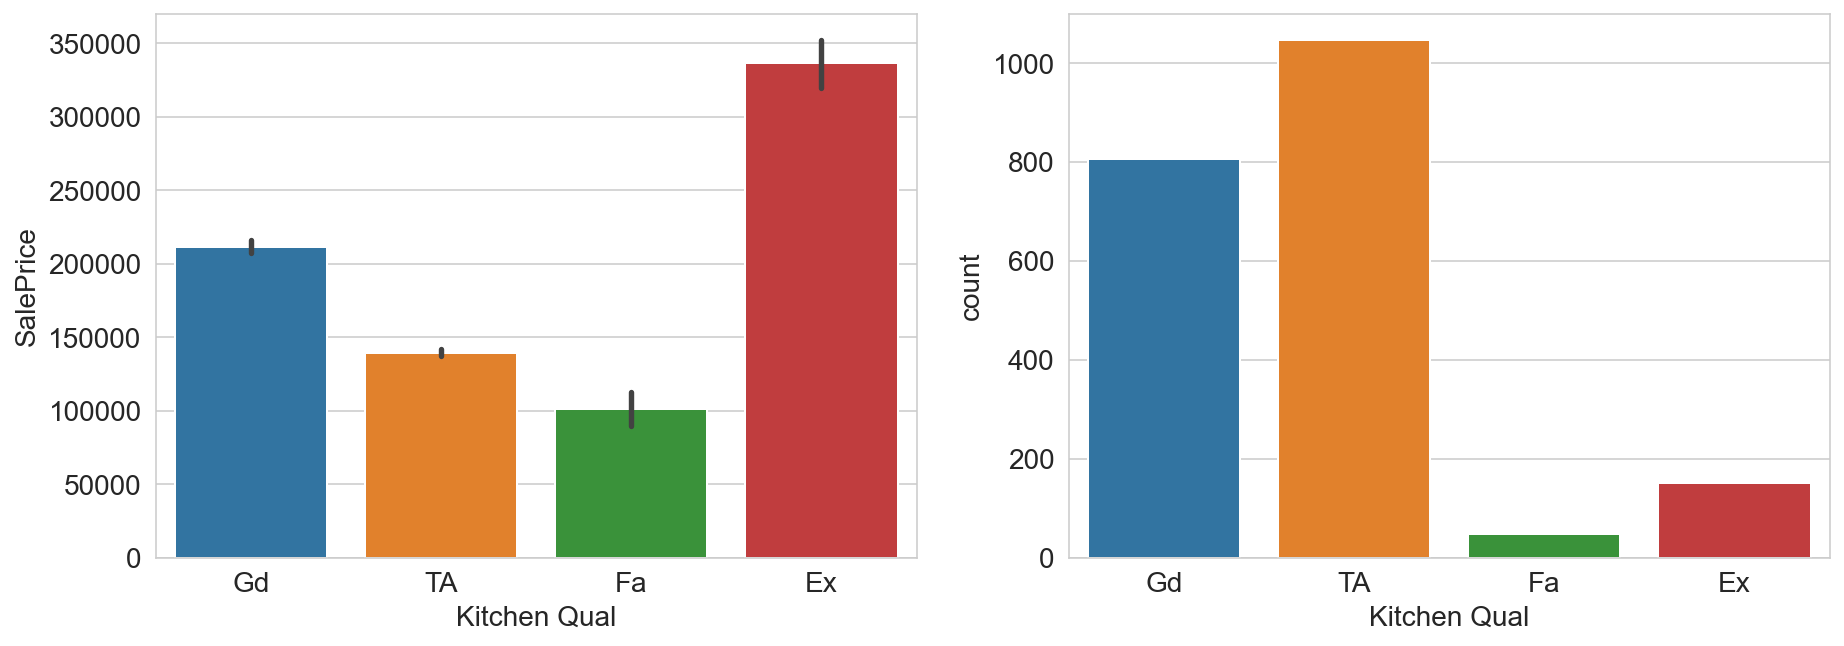

In [65]:
plot_vs_saleprice('Kitchen Qual')

For most families, kitchen is a vital part of the house. Add _Kitchen Qual_ to `ordinal_cols`.

In [66]:
ordinal_cols.append('Kitchen Qual')
selected_cols.append('Kitchen Qual')

**House Style**

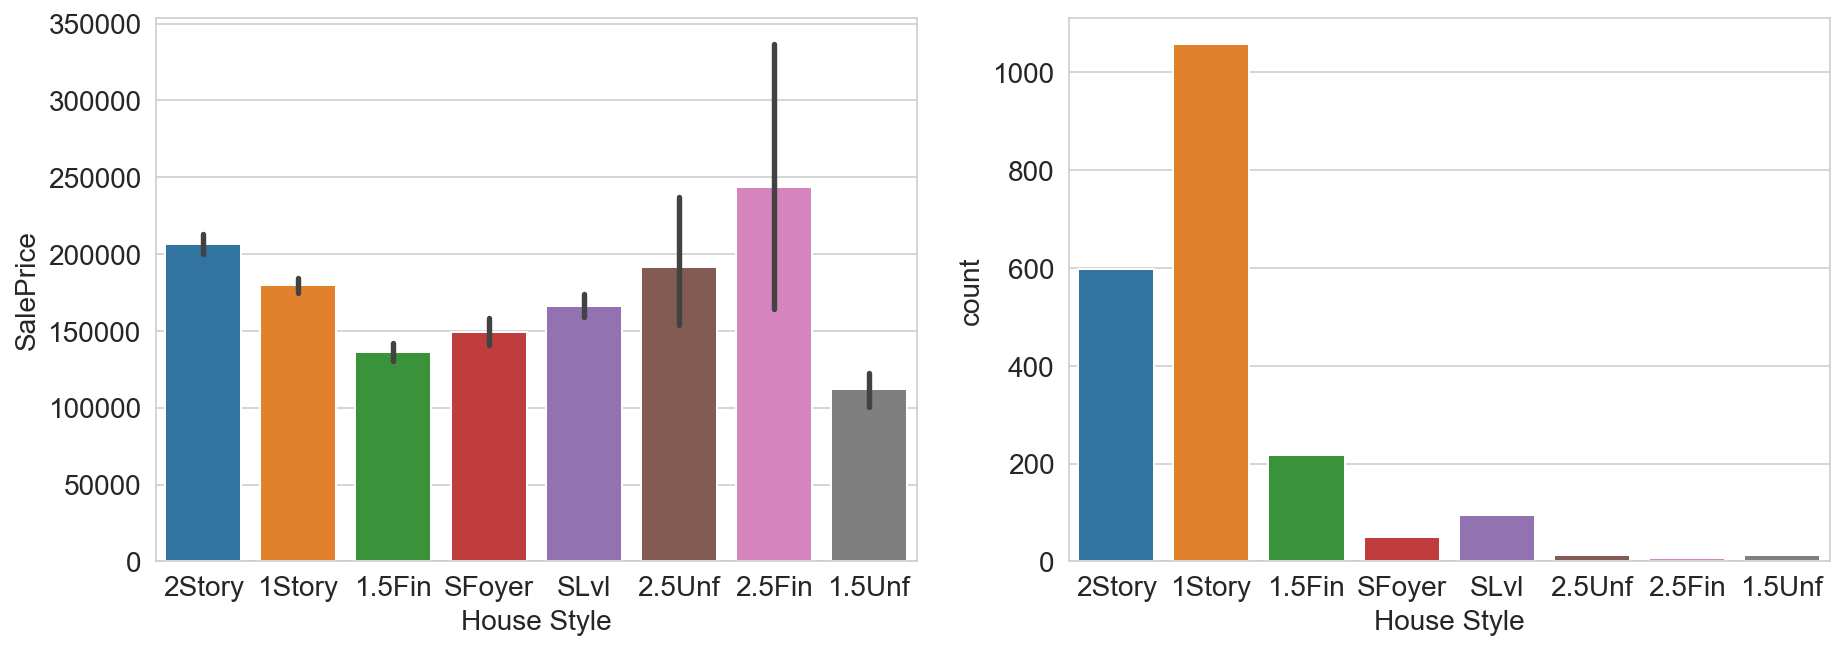

In [67]:
plot_vs_saleprice('House Style')

Most of the properties in the data are either 1 or 2 story and the price difference between them is not large. Thus, we drop this column for now but consider later for model performance if required. We create two new binary columns for 1Story and 2Story properties as they are the most prominent. This is done in the `get_clean_df()` function in this [section](#3.1-Cleaning-operations-on-the-DataFrame).

In [68]:
selected_cols.extend(['HouseStyle_1Story', 'HouseStyle_2Story'])
drop_cols.append('House Style')

**Heating QC**

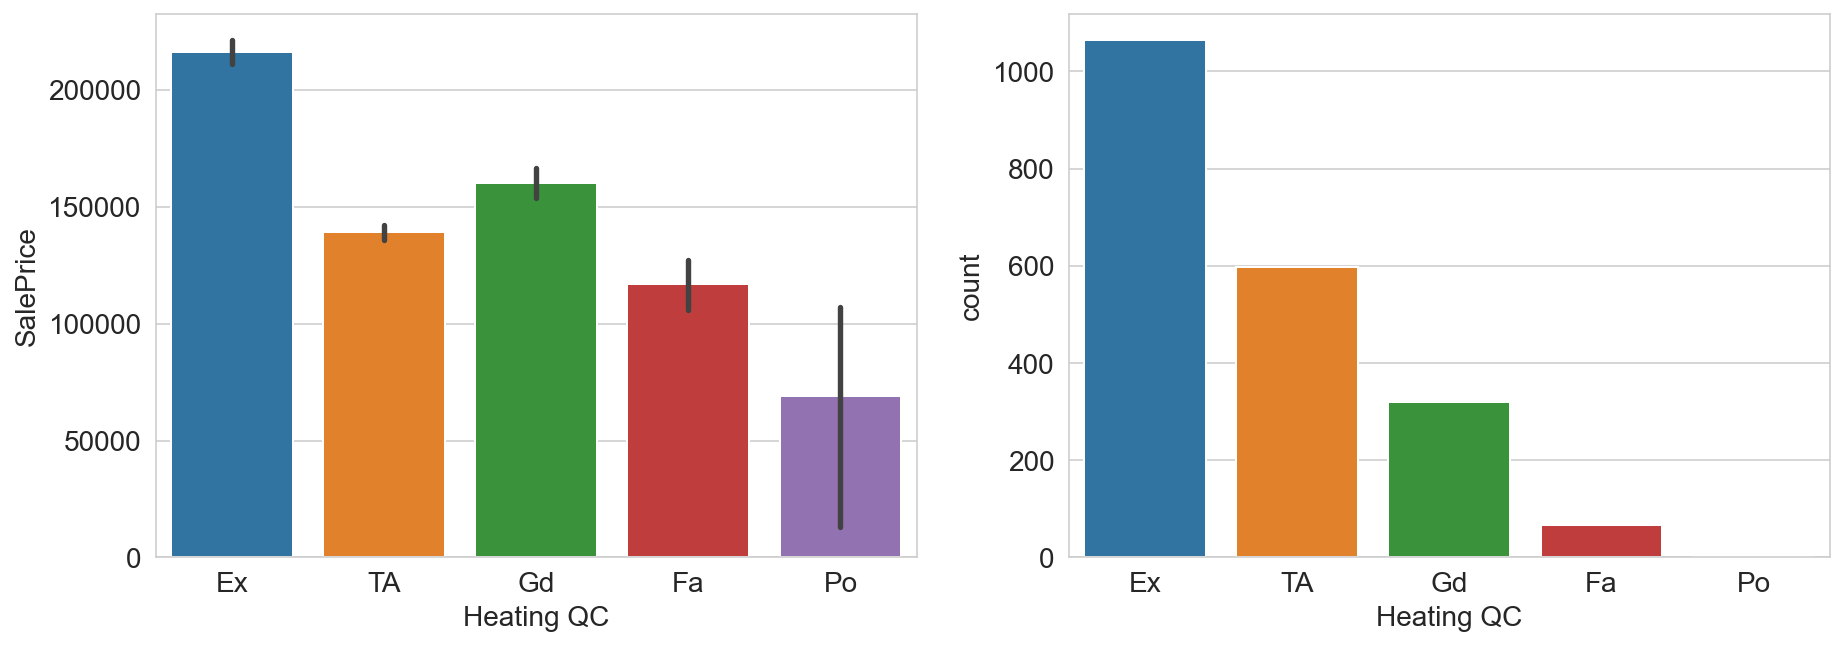

In [69]:
plot_vs_saleprice('Heating QC')

Since it can get really cold in Ames, people looking for property would definitely care about the heating quality. Add _Heating QC_ to `ordinal_cols`.

In [70]:
ordinal_cols.append('Heating QC')
selected_cols.append('Heating QC')

**Masonry veneer type**

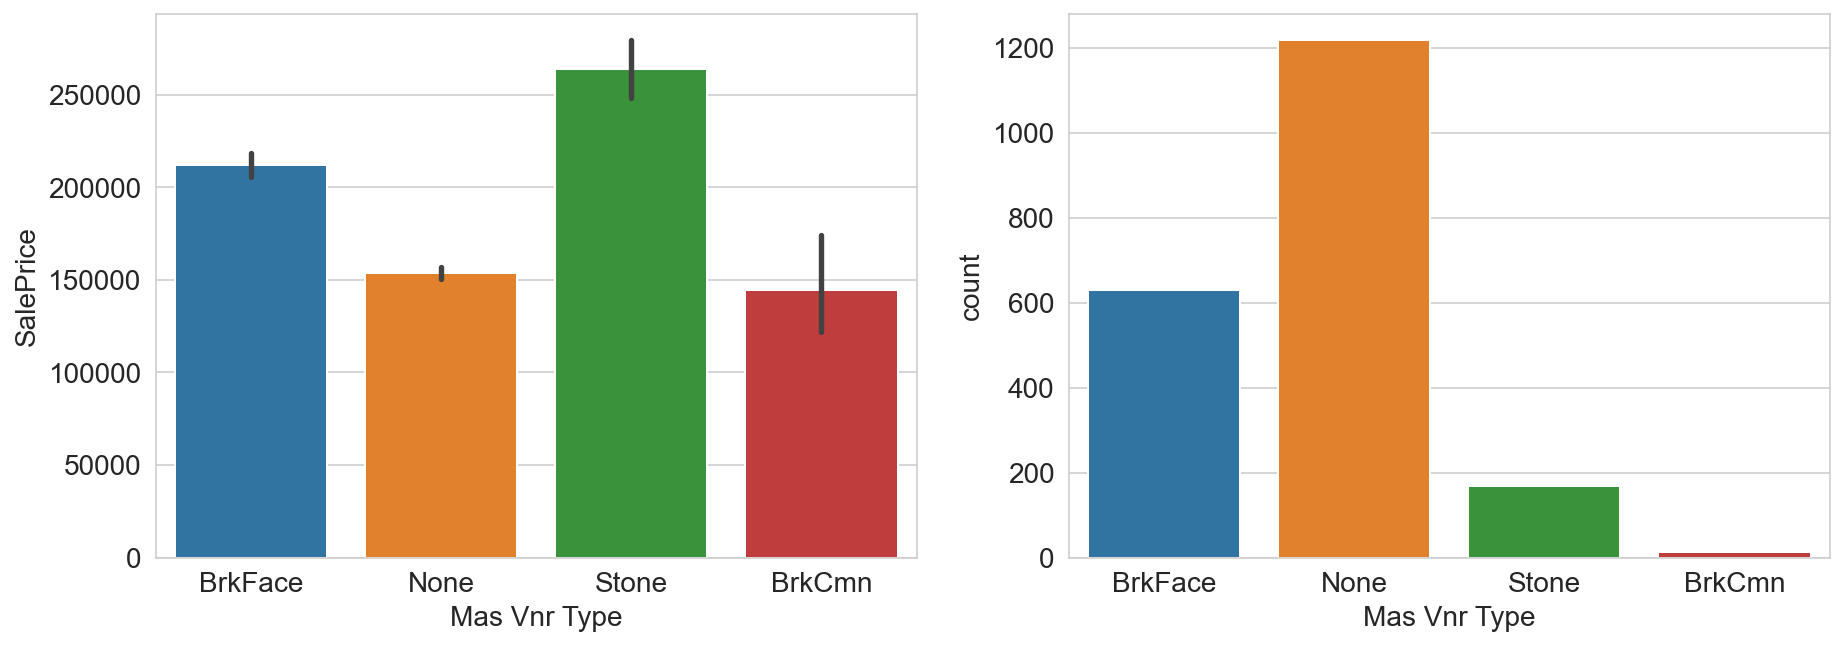

In [71]:
plot_vs_saleprice('Mas Vnr Type')

The properties with some type of masonry veneer have better prices on average compared to those that don't. But most of them don't have any masonry veneer so we can drop it.

In [72]:
drop_cols.append('Mas Vnr Type')

**Exterior Quality**

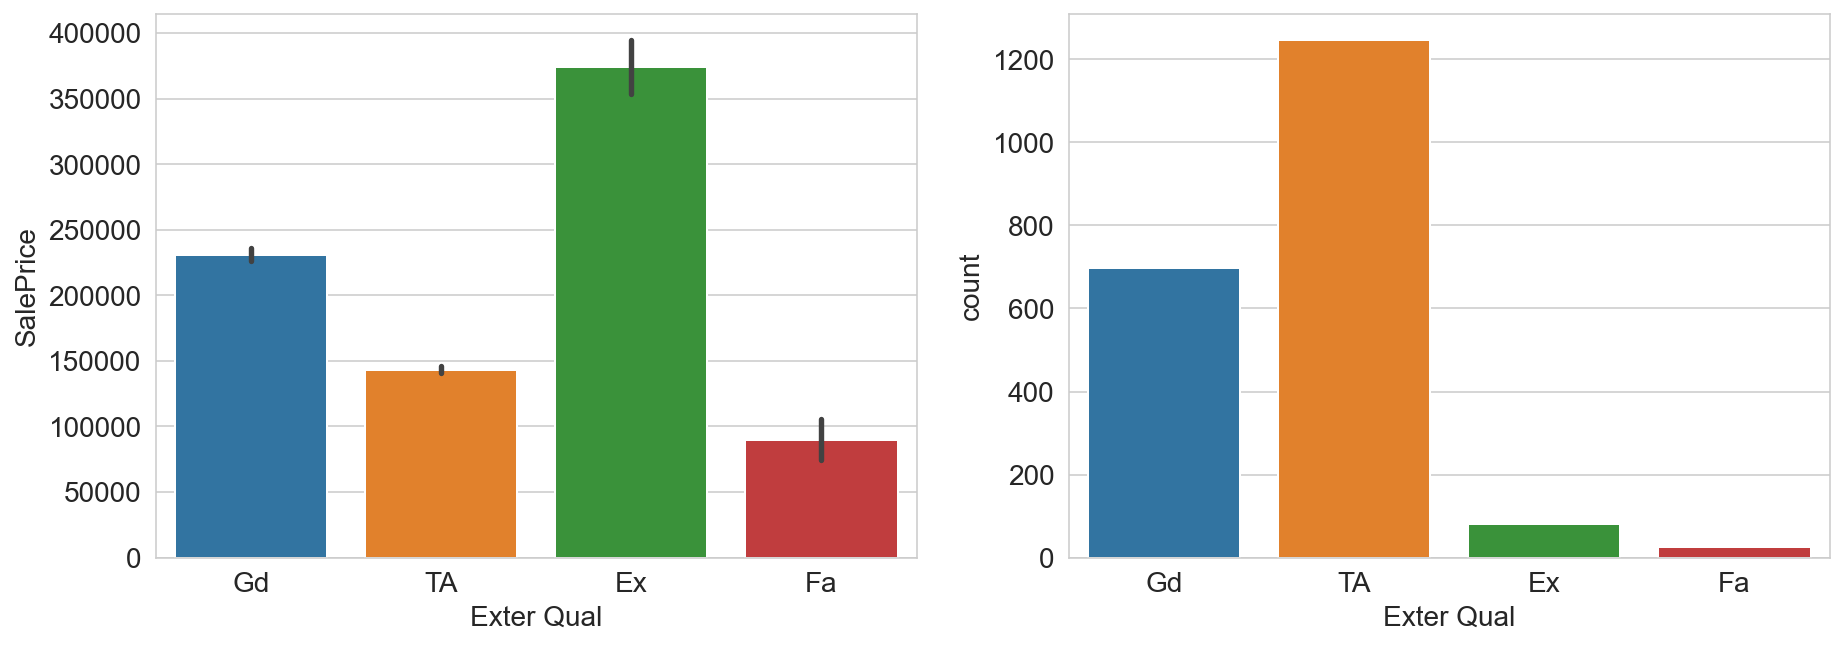

In [73]:
plot_vs_saleprice('Exter Qual')

Add to the `ordinal_cols` as it is an ordinal feature.

In [74]:
ordinal_cols.append('Exter Qual')
selected_cols.append('Exter Qual')

**Building Type**

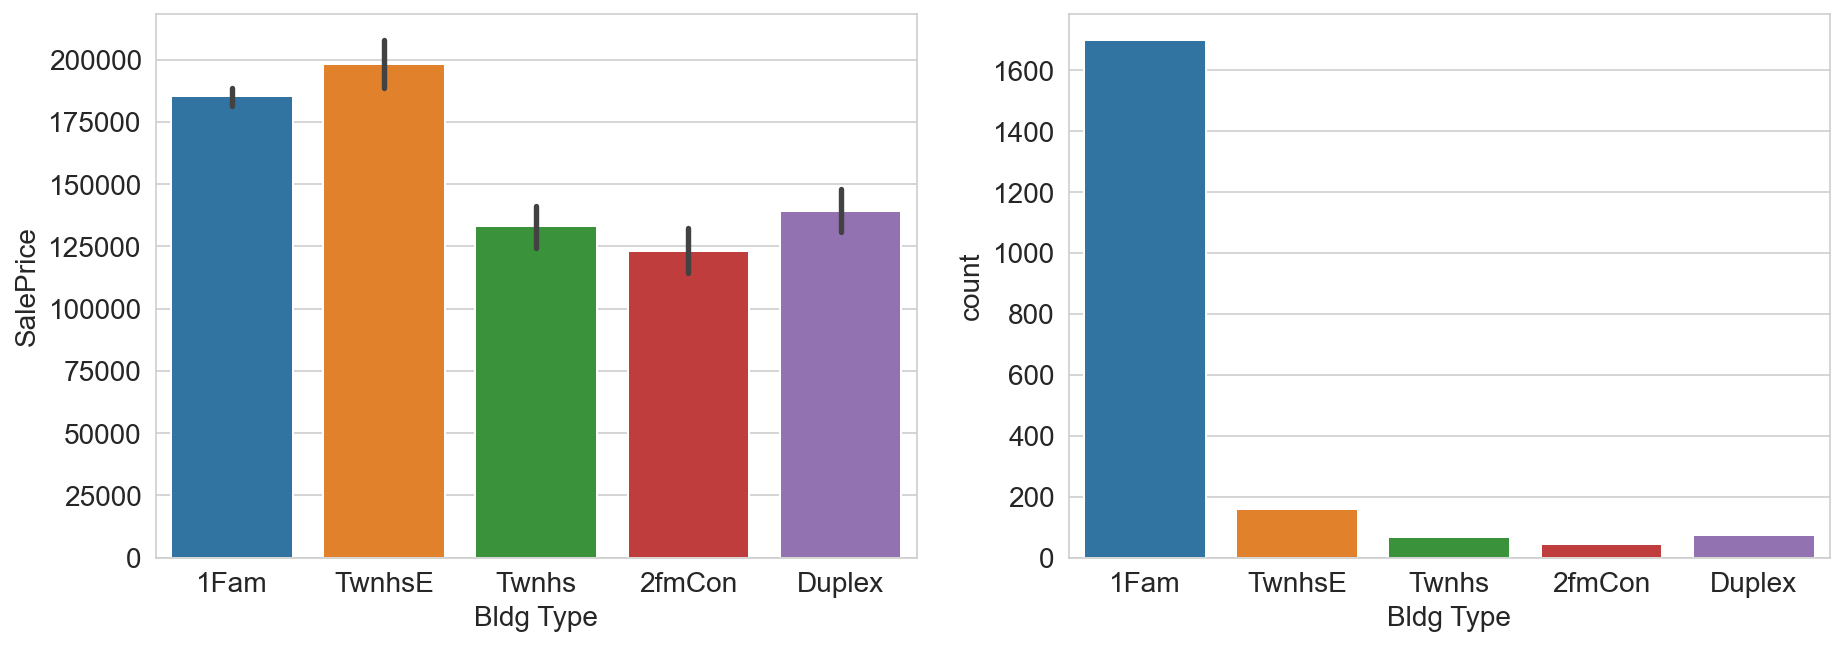

In [75]:
plot_vs_saleprice('Bldg Type')

Although the building type can have a significant impact on the price of the property, the distribution in this dataset is uneven. We drop _Bldg Type_ for now, but consider later to improve the performance of the model.

In [76]:
drop_cols.append('Bldg Type')

**MS Zoning**

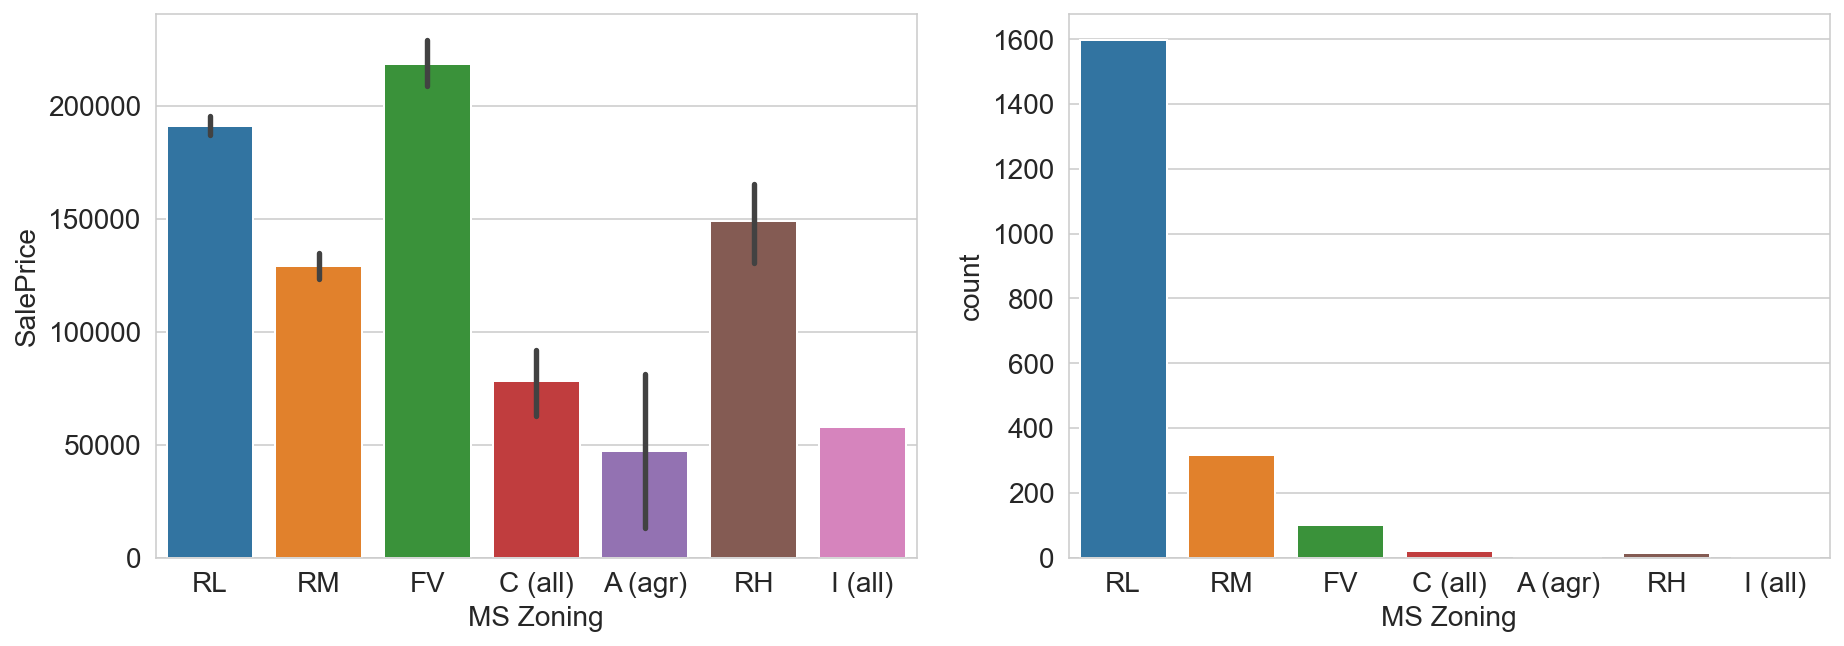

In [77]:
plot_vs_saleprice('MS Zoning')

Most of the zoning classification are residential, so we drop the _MS Zoning_ column for now. Can be divided into residential and non-residential to improve the performance of model later.

In [78]:
drop_cols.append('MS Zoning')

Features not included for training now but to consider later to improve the performance of model, if necessary:
- _MS Zoning_
- _Bldg Type_
- _Roof Style_
- _Lot Config_
- _MS SubClass_
- _Exterior 1st_
- _Exterior 2nd_
- _Mo Sold_

### Revisiting Feature Selection

As we discovered in the part II of this project that the first attempt of building a Multiple Linear Regression model did give better results than the baseline but the errors were not one might expect. Although the $RMSE$ was reduced when compared to the baseline, but the error discrepency between the __train__ and __valid__ datasets is unexplained. Here, we revisit the feature selection by:
* considering more features that were dropped at first trail
* adjusting the `train_test_split()` params

The feature set for first trial: _LotFrontage, LotArea, OverallQual, MasVnrArea, ExterQual, BsmtQual, TotalBsmtSF, HeatingQC, GrLivArea, KitchenQual, OpenPorchSF, PropertyAge, TotalBedsNBaths, HasFireplace, HasWoodDeck, HasMasonryVeneer, FoundationPConc, FoundationCBlock, FoundationBrkTil, FoundationOthers_.

### 2.5 Addressing the missing values

Now, let's get a list of the features (after dropping the `drop_cols`) with missing values after all the cleaning.

In [79]:
# List of categorical features with NaNs after dropping the drop_cols
[(col, df[col].isna().sum(), df[col].dtypes) for col in df.drop(columns=drop_cols).columns
 if df[col].isna().sum()]

[('Lot Frontage', 330, dtype('float64')),
 ('Mas Vnr Area', 22, dtype('float64')),
 ('Bsmt Qual', 55, dtype('O')),
 ('Bsmt Cond', 55, dtype('O')),
 ('Bsmt Exposure', 58, dtype('O')),
 ('BsmtFin Type 1', 55, dtype('O')),
 ('BsmtFin Type 2', 56, dtype('O')),
 ('Total Bsmt SF', 1, dtype('float64'))]

Impute the numerical data with train set mean and categorical data with train set mode. This is to avoid any data leaking to valid and test datasets.

In [80]:
# Create list for columns to convert NaN to mean
nan_to_mean_cols = ['Lot Frontage', 'Mas Vnr Area', 'Total Bsmt SF', 'Garage Cars', 'Garage Area']

# Create list for columns to convert NaN to mode
nan_to_mode_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

In [81]:
drop_cols

['Pool QC',
 'Pool Area',
 'Misc Feature',
 'Alley',
 'Fence',
 'Fireplaces',
 'Fireplace Qu',
 'PID',
 'Kitchen AbvGr',
 'Bedroom AbvGr',
 '3Ssn Porch',
 'Low Qual Fin SF',
 'Misc Val',
 'Screen Porch',
 'Enclosed Porch',
 'Wood Deck SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'TotRms AbvGrd',
 'Bsmt Half Bath',
 'Half Bath',
 'Bsmt Full Bath',
 'Full Bath',
 'Yr Sold',
 'Year Built',
 'Year Remod/Add',
 'Garage Cars',
 'Garage Area',
 'Overall Cond',
 'Neighborhood',
 'Mo Sold',
 'MS SubClass',
 'Garage Type',
 'Garage Qual',
 'Garage Cond',
 'Garage Yr Blt',
 'Garage Finish',
 'House Style',
 'Mas Vnr Type',
 'Bldg Type',
 'MS Zoning']

Drop the remaining categorical columns from the data, most of which have a dominant single value across the feature, that are neither already dropped nor considered for being converted to dummies.

In [82]:
# Drop the features not considered for building the model
drop_cols.extend([col for col in df.select_dtypes(['object']).columns
                  if (col not in drop_cols) and (col not in ordinal_cols)])

## 3 CSS $-$ Cleaning, Spliting & Saving

As the section title suggests, here we perform all the cleaning and modifying steps in a single function so it is easy to replicate between different datasets. We then split the data as decided and then save the clean data.

In [83]:
# Define a dictionary with month number and name as key-value pairing
month_name = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

### 3.1 Cleaning operations on the DataFrame

After performing all the EDA and observing some relationships, we now implement all the changes suggested above. These changes will be carried out on the three datasets separately $-$ **_train, valid and test_**.

#### One Hot Encode categorical features selected for training

In [84]:
df['Foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

Since the distribution contains mostly $-$ PConc, CBlock and BrkTil $-$ we will _one-hot encode_ these three values into individual binary value columns and create another columns for others. This is done in the `get_clean_df()` function later. Later, remove the original feature column.

In [85]:
drop_cols.append('Foundation')
selected_cols.extend(['FoundationCBlock', 'FoundationPConc', 'FoundationBrkTil'])

#### Ordinal features

In [86]:
# Ordinal columns to be converted to numbers
ordinal_cols

['Bsmt Qual', 'Kitchen Qual', 'Heating QC', 'Exter Qual']

In [87]:
# Define all the relations for ordinal features to convert values to integers
qual_encoder = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0
}

Using the `pandas.Series.map` method, transform the features in `ordinal_cols` to numbers, as carried out in `get_clean_df()` function. The NaN values will be replaced with mode.

**Cleaning function**

In [88]:
# Create a function to perform all the cleaning steps on each dataset
def get_clean_df(_df, nan_to_na_cols=[], nan_to_mode_cols=[], nan_to_mean_cols=[], ordinal_cols=[], drop_cols=[]):
    
    ## Replace NaNs
    # NOTE: To avoid leaking, we use the train mean/mode to replace NaNs
    
    # Replace NaN with NA
    for col in nan_to_na_cols:
        _df[col].fillna('NA', inplace=True)
    
    # Replace NaN to mode
    for col in nan_to_mode_cols:
        _df[col].fillna(df_train[col].mode()[0], inplace=True)
    
    # Replace NaN to mean
    for col in nan_to_mean_cols:
        _df[col].fillna(df_train[col].mean(), inplace=True)
    
    
    ## Create new feature columns
    ## Numermic columns
    # Calculate the PropertyAge
    _df['PropertyAge'] = _df['Yr Sold'] - _df['Year Built']
    
    # Add the total bedroom and bathrooms in the property into TotalBedsNBath
    _df['TotalBedsNBaths'] = _df[['TotRms AbvGrd', 'Bsmt Half Bath', 'Half Bath', 'Bsmt Full Bath', 'Full Bath']].T.sum()
    
    # Create an interaction term from Garage Cars and Garage Area
    _df['GarageCarsNArea'] = _df['Garage Cars'] * _df['Garage Area']
    
    ## Binarized columns
    # Add the HasFireplace column
    _df['HasFireplace'] = _df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    
    # Add the HasWoodDeck column
    _df['HasWoodDeck'] = _df['Wood Deck SF'].apply(lambda x: 1 if x > 0 else 0)
    
    # Add the GarageAttached column
    _df['GarageAttached'] = _df['Garage Type'].map({'Attchd': 1, 'Detchd': 0})
    _df['GarageAttached'].fillna(0, inplace=True)
    
    # Add the binarized columns to list
    binarized_cols.extend(['HasFireplace', 'HasWoodDeck', 'GarageAttached'])
    
    
    ## Modify existing feature columns
    # Convert unused numerical data to object
    _df[['Id']] = _df[['Id']].applymap(lambda x: str(x))
    
    # Replace month name to number in Mo Sold
    _df[['Mo Sold']] = _df['Mo Sold'].apply(lambda x: x if isinstance(x, str) else month_name[x])
    
    
    ## Remove outliers
    # Kepp observations with Lot Area < 40000
#     _df = _df.loc[_df['Lot Area'] < 40000]
    _df.loc[_df['Lot Area'] > 40000, 'Lot Area'] = 40000
    
    # Remove outliers for Gr Liv Area & Total Bsmt SF
#     _df = _df.loc[(_df['Gr Liv Area'] < 5000) | (_df['Total Bsmt SF'] < 5000)]
    _df.loc[_df['Gr Liv Area'] > 4000, 'Gr Liv Area'] = 4000
    _df.loc[_df['Total Bsmt SF'] > 4000, 'Total Bsmt SF'] = 4000
    
    
    ## Manually create dummy columns
    # Create dummy columns for Foundation
    _df['FoundationPConc'] = _df['Foundation'].apply(lambda x: 1 if x == 'PConc' else 0)
    _df['FoundationCBlock'] = _df['Foundation'].apply(lambda x: 1 if x == 'CBlock' else 0)
    _df['FoundationBrkTil'] = _df['Foundation'].apply(lambda x: 1 if x == 'BrkTil' else 0)
    
    # As the dummy columns are binary as well, add these to binarized_cols
    binarized_cols.extend(['FoundationPConc', 'FoundationCBlock', 'FoundationBrkTil'])
    
    # Create dummy columns for Neighbohoods
    _df['NH_NAmes'] = _df['Neighborhood'].apply(lambda x: 1 if x == 'NAmes' else 0)
    _df['NH_CollgCr'] = _df['Neighborhood'].apply(lambda x: 1 if x == 'CollgCr' else 0)
    _df['NH_OldTown'] = _df['Neighborhood'].apply(lambda x: 1 if x == 'OldTown' else 0)
    _df['NH_Others'] = _df['Neighborhood'].apply(lambda x: 1
                                                 if x != 'NAmes'
                                                 and x != 'CollgCr'
                                                 and x != 'OltTown'
                                                 else 0)
    
    # Create dummy columns for HouseStyle
    _df['HouseStyle_1Story'] = _df['House Style'].apply(lambda x: 1 if x == '1Story' else 0)
    _df['HouseStyle_2Story'] = _df['House Style'].apply(lambda x: 1 if x == '2Story' else 0)
    
    # As the dummy columns are binary as well, add these to binarized_cols
    binarized_cols.extend(['NH_NAmes', 'NH_CollgCr', 'NH_OldTown', 'NH_Others', 'HouseStyle_1Story', 'HouseStyle_2Story'])
    
    
    
    ## One-Hot Encode the oridinal features to numbers
    for col in ordinal_cols:
        _df[col] = _df[col].map(qual_encoder)
        
    
    ## Drop columns
    if drop_cols:
        _df.drop(columns=drop_cols, inplace=True)
    
    return _df

### 3.2 Splitting the data

In [89]:
# Split the df into df_train and df_valid
df_train, df_valid = train_test_split(df, random_state=5, test_size=0.4)

In [90]:
# Get the clean DataFrames
df_train_clean = get_clean_df(_df=df_train.copy(),
                              nan_to_na_cols=nan_to_na_cols,
                              nan_to_mode_cols=nan_to_mode_cols,
                              nan_to_mean_cols=nan_to_mean_cols,
                              ordinal_cols=ordinal_cols,
                              drop_cols=drop_cols)

df_valid_clean = get_clean_df(_df=df_valid.copy(),
                              nan_to_na_cols=nan_to_na_cols,
                              nan_to_mode_cols=nan_to_mode_cols,
                              nan_to_mean_cols=nan_to_mean_cols,
                              ordinal_cols=ordinal_cols,
                              drop_cols=drop_cols)

df_test_clean = get_clean_df(_df=df_test.copy(),
                             nan_to_na_cols=nan_to_na_cols,
                             nan_to_mode_cols=nan_to_mode_cols,
                             nan_to_mean_cols=nan_to_mean_cols,
                             ordinal_cols=ordinal_cols,
                             drop_cols=drop_cols)

In [91]:
# Rename columns
df_train_clean.columns = df_train_clean.columns.str.replace(' ','')
df_valid_clean.columns = df_valid_clean.columns.str.replace(' ','')
df_test_clean.columns = df_test_clean.columns.str.replace(' ','')

In [92]:
# Get the columns to scale (not binarized_cols)
scale_cols = [col for col in df_train_clean.columns if col not in binarized_cols
                                                    and col != 'SalePrice' and col != 'Id']

In [93]:
# Note the columns to scale while modeling in Part II
scale_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'TotalBsmtSF',
 'HeatingQC',
 'GrLivArea',
 'KitchenQual',
 'OpenPorchSF',
 'PropertyAge',
 'TotalBedsNBaths',
 'GarageCarsNArea']

In [94]:
# Get the features selected for building the model
df_train_clean.dtypes

Id                    object
LotFrontage          float64
LotArea                int64
OverallQual            int64
MasVnrArea           float64
ExterQual              int64
BsmtQual               int64
TotalBsmtSF          float64
HeatingQC              int64
GrLivArea              int64
KitchenQual            int64
OpenPorchSF            int64
SalePrice              int64
PropertyAge            int64
TotalBedsNBaths      float64
GarageCarsNArea      float64
HasFireplace           int64
HasWoodDeck            int64
GarageAttached       float64
FoundationPConc        int64
FoundationCBlock       int64
FoundationBrkTil       int64
NH_NAmes               int64
NH_CollgCr             int64
NH_OldTown             int64
NH_Others              int64
HouseStyle_1Story      int64
HouseStyle_2Story      int64
dtype: object

### 3.3 Saving $-$ export the data

In [95]:
# Save the DataFrame to CSV
df_train_clean.to_csv('./../datasets/train_clean.csv',index=False)
df_valid_clean.to_csv('./../datasets/valid_clean.csv',index=False)
df_test_clean.to_csv('./../datasets/test_clean.csv',index=False)